In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib.ticker as mticker

from matplotlib.dates import DateFormatter
from datetime import timedelta

billboard_hot_100 = pd.read_csv("../billboard_hot_100.csv")
data_kaggle = pd.read_csv("tracks_features.csv")

billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],
                                                            infer_datetime_format=True)

C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\776058954.py:15: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  billboard_hot_100["first_day_of_the_week"] = pd.to_datetime(billboard_hot_100["first_day_of_the_week"],


In [2]:
billboard_hot_100["year"] = billboard_hot_100["first_day_of_the_week"].dt.year
billboard_hot_100["max_weeks_on_chart"] = billboard_hot_100.groupby(["artist", "song_name"])["weeks_on_chart"].transform("max")
billboard_hot_100["top_position"] = billboard_hot_100.groupby(["artist", "song_name"])["position"].transform("min")

In [3]:
# MTV Launch date
mtv_launch_date = pd.to_datetime("1981-08-01", infer_datetime_format=True)

# Spotify creation date
spotify_creation_date = pd.to_datetime("2008-01-01", infer_datetime_format=True)

# Youtube creation date
youtube_creation_date = pd.to_datetime("2005-02-14", infer_datetime_format=True)

# Apple music creation date
apple_music_creation_date = pd.to_datetime("2015-06-30", infer_datetime_format=True)

# CDs creation date
cds_creation_date = pd.to_datetime("1982-08-17", infer_datetime_format=True)

# MP3 creation date
mp3_creation_date = pd.to_datetime("1991-12-01", infer_datetime_format=True)

# iTunes release date
itunes_creation_date = pd.to_datetime("2001-01-09", infer_datetime_format=True)

# Cassettes creation date
cassettes_creation_date = pd.to_datetime("1963-08-30", infer_datetime_format=True)

C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\1792693761.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  mtv_launch_date = pd.to_datetime("1981-08-01", infer_datetime_format=True)
C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\1792693761.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  spotify_creation_date = pd.to_datetime("2008-01-01", infer_datetime_format=True)
C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\1792693761.py:8: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict ve

In [4]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.style.use('tableau-colorblind10')


## Songs statistics

### Songs lifetime on chart

In [5]:
billboard_hot_100_subset = billboard_hot_100[["artist", "song_name", "year", "max_weeks_on_chart"]].drop_duplicates()

In [6]:
from scipy.stats import median_abs_deviation

def std_error_of_median(data):
    mad = median_abs_deviation(data)
    std_median = mad / np.sqrt(len(data))
    return std_median

In [7]:
avg_week_on_chart_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year").mean()
std_error = billboard_hot_100_subset[["year", "max_weeks_on_chart"]].groupby(by="year").sem()

median_weeks_on_chart_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year").median()
median_std_error = billboard_hot_100_subset[["year", "max_weeks_on_chart"]].groupby(by="year")["max_weeks_on_chart"].apply(
    std_error_of_median).rename("max_weeks_on_chart")

twntieth_weeks_on_chart_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year").quantile(0.2)

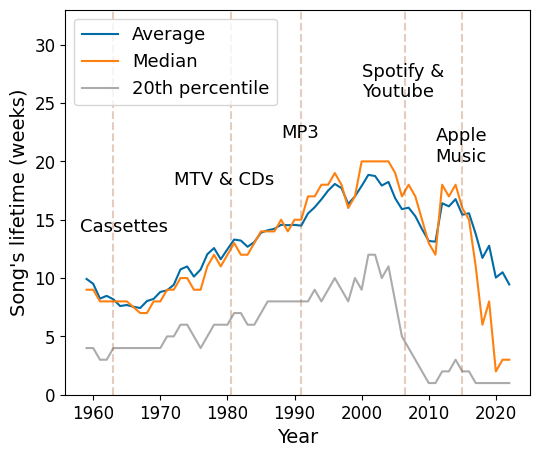

In [8]:
avg_weeks_on_chart_plot_yearly = avg_week_on_chart_yearly.plot(kind='line', figsize=(6, 5), legend=False)
median_weeks_on_chart_yearly.plot(kind='line', figsize=(6, 5), legend=False,
    ax=avg_weeks_on_chart_plot_yearly)
twntieth_weeks_on_chart_yearly.plot(kind='line', figsize=(6, 5), legend=False,
    ax=avg_weeks_on_chart_plot_yearly)

brown = "#a65628"
avg_weeks_on_chart_plot_yearly.axvline(x = youtube_creation_date.year + ((spotify_creation_date.year - youtube_creation_date.year)/2),
                                color=brown, ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = apple_music_creation_date.year, color=brown, ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = mtv_launch_date.year + ((mtv_launch_date.year - cds_creation_date.year)/2), color=brown,
                                ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = mp3_creation_date.year, color=brown, ls="dashed", alpha=0.3)
avg_weeks_on_chart_plot_yearly.axvline(x = cassettes_creation_date.year, color=brown, ls="dashed", alpha=0.3)

plt.text(youtube_creation_date.year - 5, 25.5, "Spotify &\nYoutube", fontsize=13)
plt.text(apple_music_creation_date.year - 4, 20, "Apple\nMusic", fontsize=13)
plt.text(mtv_launch_date.year - 9, 18, "MTV & CDs", fontsize=13)
plt.text(mp3_creation_date.year - 3, 22, "MP3", fontsize=13)
plt.text(cassettes_creation_date.year - 5, 14, "Cassettes", fontsize=13)

plt.xlabel("Year")
plt.ylabel("Song's lifetime (weeks)")
plt.legend(["Average", "Median", "20th percentile"], loc="upper left", fontsize=13)
plt.ylim([0, 33])

# plt.savefig("figures/average_weeks_on_chart_yearly.pdf", format="pdf")
plt.show()

R-squared for model with breakpoint at 1960.0 segments: 0.398988478207452
R-squared for model with breakpoint at 1966.6666666666667 segments: 0.4109377752413387
R-squared for model with breakpoint at 1973.3333333333333 segments: 0.4812616608689785
R-squared for model with breakpoint at 1980.0 segments: 0.5779093836643059
R-squared for model with breakpoint at 1986.6666666666667 segments: 0.6803801043797972
R-squared for model with breakpoint at 1993.3333333333333 segments: 0.7943428655050352
R-squared for model with breakpoint at 2000.0 segments: 0.8783821485768418
R-squared for model with breakpoint at 2006.6666666666667 segments: 0.8419806812249099
R-squared for model with breakpoint at 2013.3333333333333 segments: 0.7658870927872841
R-squared for model with breakpoint at 2020.0 segments: 0.5328678844500156
Best r squared: 0.8783821485768418
P values: [8.93637638e-23 2.80574042e-11 9.30739726e-05]


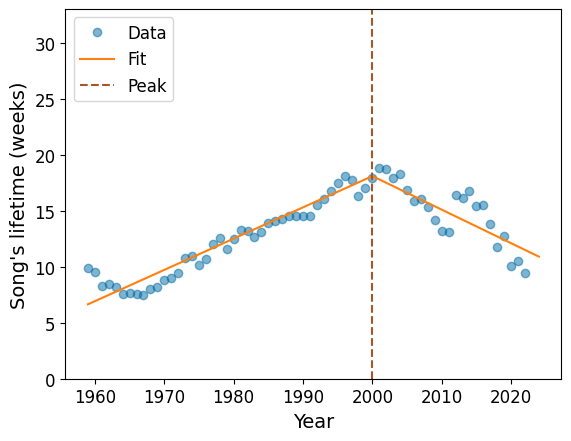

In [9]:
import numpy as np
import sys
import pwlf
import statsmodels.api as sm
import matplotlib.pyplot as plt

x = avg_week_on_chart_yearly.index.values
y = avg_week_on_chart_yearly.values.flatten()

best_model = None
r_squared_best = 0
y_hat = []
best_break = 1959
x_hat = np.linspace(1959, 2024, 100)

for i in np.linspace(1960, 2020, 10):
    model = pwlf.PiecewiseLinFit(x, y)
    values = model.fit_with_breaks([1959, i, 2024])
    print("R-squared for model with breakpoint at {} segments: {}".format(i, model.r_squared()))
    if model.r_squared() > r_squared_best:
        best_model = model
        r_squared_best = model.r_squared()
        best_break = i
        y_hat = model.predict(x_hat)

print(f"Best r squared: {best_model.r_squared()}")
# first intercepts + slopes, then breakpoints
print(f"P values: {model.p_values()}")

plt.ylabel("Song's lifetime (weeks)")
plt.xlabel("Year")
plt.plot(x, y, 'o', alpha=0.5, label="Data")
plt.plot(x_hat, y_hat, '-', label="Fit")
plt.ylim([0, 33])
plt.axvline(x=best_break, linestyle='--', color=brown, label="Peak")
plt.legend(loc="upper left")
plt.savefig("appendix/1.A.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

R squared: 0.9102676109858646
P values: [4.04057552e-042 6.72458868e-004 6.18905554e-024 3.62285018e-151]


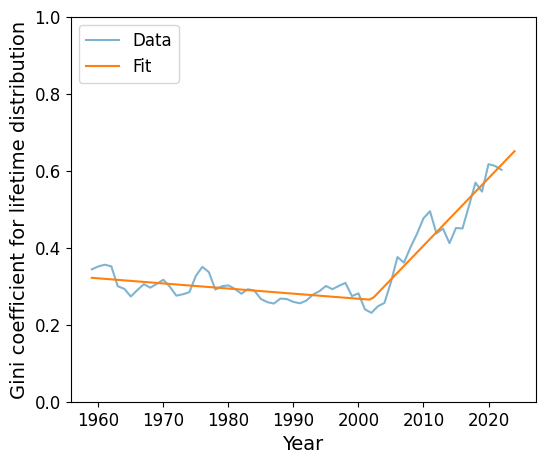

In [10]:
# gini coefficient using pairwisedifference formula for lifetime distribution
def gini_coefficient(data):
    n = len(data)
    data = np.sort(data)
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * data)) / (n * np.sum(data))

gini_coefficient_yearly = billboard_hot_100_subset[["max_weeks_on_chart", "year"]].groupby(by="year")["max_weeks_on_chart"].apply(gini_coefficient)

model = pwlf.PiecewiseLinFit(gini_coefficient_yearly.index.values, gini_coefficient_yearly.values.flatten())
breaks = model.fit(2)
x_hat = np.linspace(1959, 2024, 100)
y_hat = model.predict(x_hat)

print(f"R squared: {model.r_squared()}")
print(f"P values: {model.p_values(method="non-linear")}")

gini_coefficient_yearly.plot(kind='line', figsize=(6, 5), label="Data", alpha=0.5)
plt.plot(x_hat, y_hat, '-', label="Fit")

plt.xlabel("Year")
plt.ylabel("Gini coefficient for lifetime distribution")
plt.ylim([0, 1])
plt.legend(loc="upper left")
plt.savefig("appendix/1.B.1.jpg", format="jpg", dpi=300, bbox_inches="tight")

plt.show()


### Average lifetime per decade

In [11]:
def get_decade(year):
    return year - year % 10

billboard_hot_100["decade"] = billboard_hot_100["year"].apply(get_decade).astype(str) + "s"

C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\4014598293.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='decade', y="max_weeks_on_chart", order=[str(decade) + "s" for decade in [1960, 1970, 1980, 1990, 2000, 2010]], data=billboard_hot_100_subset,


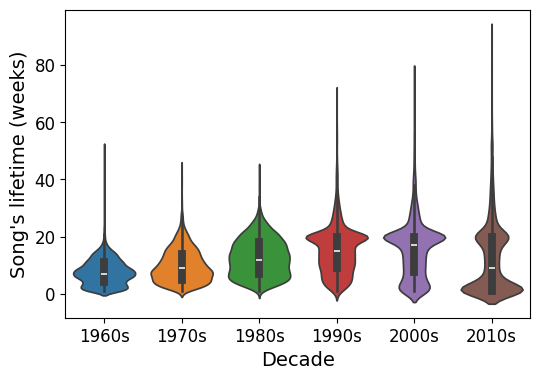

In [12]:
plt.figure(figsize=(6, 4))

billboard_hot_100_subset = billboard_hot_100[["artist", "song_name", "decade", "max_weeks_on_chart"]].drop_duplicates()
sns.violinplot(x='decade', y="max_weeks_on_chart", order=[str(decade) + "s" for decade in [1960, 1970, 1980, 1990, 2000, 2010]], data=billboard_hot_100_subset,
               palette="tab10")

plt.xlabel("Decade")
plt.ylabel("Song's lifetime (weeks)")

# plt.savefig("figures/lifeftime_distribution_per_decade.pdf", format="pdf", bbox_inches='tight')
plt.show()

Observed stat: 0.8333562271062268
95% CI: (-0.24, 0.27)
Observed stat 0.8333562271062268 is outside the 95% CI (indicating significance).
Best r squared: 0.6604512371775977
P values: [6.39330198e-13 3.53684371e-16]


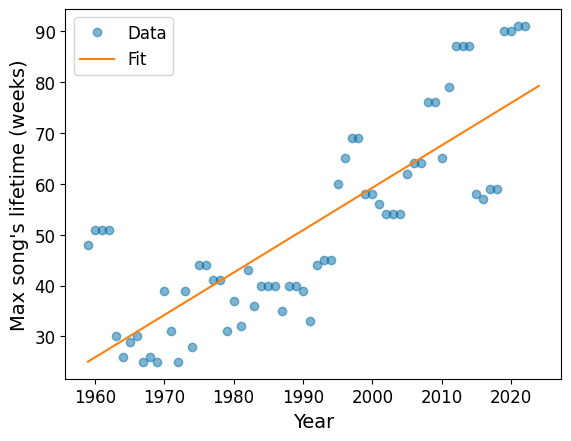

In [13]:
# plot max of max_weeks on the chart for each year and perform linear regression and get summary

max_weeks_on_chart_yearly = billboard_hot_100[["max_weeks_on_chart", "year"]].groupby(by="year").max()

x = max_weeks_on_chart_yearly.index.values
y = max_weeks_on_chart_yearly.values.flatten()

model = pwlf.PiecewiseLinFit(x, y)
breaks = model.fit(1)
r_squared_best = model.r_squared()
p_values_best = model.p_values(method="non-linear")
slope_best = model.slopes[0]

test_slopes = []

for i in range(1, 1001):
    # shuffle points and perform piecewise linear regression
    y_test = np.random.permutation(y) 
    model_test = pwlf.PiecewiseLinFit(x, y_test)
    model_test.fit(1)
    slopes = model_test.slopes
    test_slopes.append(slopes[0])

# Compute 95% confidence interval (CI) for the observed statistic
lower_percentile = 2.5
upper_percentile = 97.5

ci_lower = np.percentile(test_slopes, lower_percentile)
ci_upper = np.percentile(test_slopes, upper_percentile)

print(f"Observed stat: {slope_best}")
print(f"95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")

if slope_best < ci_lower or slope_best > ci_upper:
    print(f"Observed stat {slope_best} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed stat {slope_best} is inside the 95% CI.")

print(f"Best r squared: {r_squared_best}")
print(f"P values: {p_values_best}")

x_hat = np.linspace(1959, 2024, 100)
y_hat = model.predict(x_hat)

plt.ylabel("Max song's lifetime (weeks)")
plt.xlabel("Year")
plt.plot(x, y, 'o', label="Data", alpha=0.5)
plt.plot(x_hat, y_hat, label="Fit")
plt.legend()
plt.savefig("appendix/1.B.2.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()


### Average weeks on the chart before and after reaching the top position

In [14]:
def get_past_weeks(row):
    top_position = row["top_position"].iloc[0]
    # take first day of the week when the song was in top position
    top_position_time = row[
        (row["position"] == top_position)]["first_day_of_the_week"].values[0]
    past_weeks = row[
        (row["first_day_of_the_week"] <= top_position_time)]["weeks_on_chart"].max()
    return past_weeks

df_past_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
    lambda row: get_past_weeks(row)).rename("past_weeks").reset_index()

billboard_hot_100 = billboard_hot_100.merge(df_past_weeks[["artist", "song_name", "past_weeks"]], on=["artist", "song_name"], how="left")

def get_future_weeks(row):
    top_position = row["top_position"].iloc[0]
    past_weeks = row["past_weeks"].iloc[0]
    # take first day of the week when the song was in top position
    top_position_time = row[
        (row["position"] == top_position)]["first_day_of_the_week"].values[0]
    max_weeks = row[
        (row["first_day_of_the_week"] > top_position_time)]["weeks_on_chart"].max()
    if max_weeks is np.nan or max_weeks == 0:
        return 0
    future_weeks = max_weeks - past_weeks
    if future_weeks is np.nan or future_weeks < 0:
        return 0
    return future_weeks

df_future_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
    lambda row: get_future_weeks(row)).rename("future_weeks").reset_index()

billboard_hot_100 = billboard_hot_100.merge(df_future_weeks[["artist", "song_name", "future_weeks"]], on=["artist", "song_name"], how="left")

C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\3322084532.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_past_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(
C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\3322084532.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_future_weeks = billboard_hot_100.groupby(["artist", "song_name"]).apply(


C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\2135012171.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_max = pd.concat([top_positions_max, new_row_max])
C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\2135012171.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_future = pd.concat([top_positions_future, new_row_future])
C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\2135012171.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or a

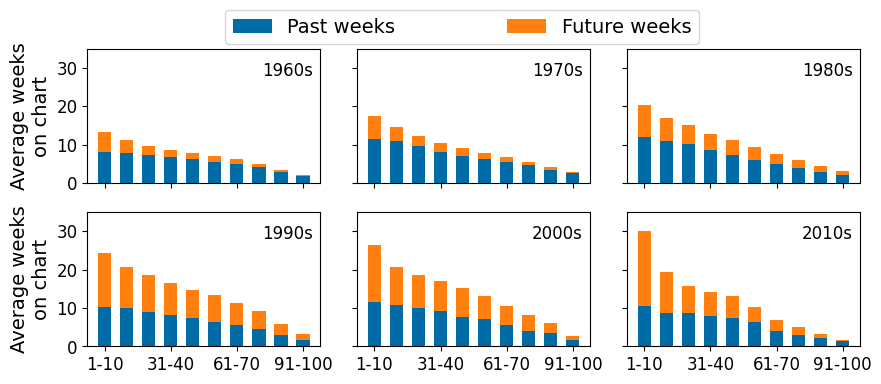

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(9, 4), sharey=True, sharex=True)

col_i = 0
row_i = 0

for year in range(1960, 2020, 10):
    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    # take songs only from this decade
    songs_in_decade = billboard_hot_100[~(billboard_hot_100["artist"].isin(songs_from_other_decades["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_decades["song_name"]))]
    
    top_positions_max = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_future = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_past = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    for top_position in range(10, 110, 10):
        avg_max_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["max_weeks_on_chart"].first().mean()
        new_row_max = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_max_weeks}, index=[0])
        top_positions_max = pd.concat([top_positions_max, new_row_max])

        avg_future_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["future_weeks"].first().mean()
        new_row_future = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_future_weeks}, index=[0])
        top_positions_future = pd.concat([top_positions_future, new_row_future])

        avg_past_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["past_weeks"].first().mean()
        new_row_past = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_past_weeks}, index=[0])
        top_positions_past = pd.concat([top_positions_past, new_row_past])

    ind = np.arange(top_positions_max["top_positions_range"].shape[0])
    # bar_width = 0.24
    bar_width = 0.6
    ax = axes[row_i, col_i]
    ax.bar(ind + bar_width, top_positions_past["avg_weeks"], bar_width, label="Past weeks")
    ax.bar(ind + bar_width, top_positions_future["avg_weeks"], bar_width, label="Future weeks",
           bottom=top_positions_past["avg_weeks"])
    ax.text(0.75, 0.8, f"{year}s", transform=ax.transAxes)
    ax.set_ylim([0, 21])
    if col_i >= 3:
        ax.set_xlabel("Top positions range")
    if col_i % 3 == 0:
        ax.set_ylabel("Average weeks\non chart")
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.set_xticks(ind[::3] + bar_width, top_positions_max["top_positions_range"].tolist()[::3])

    if col_i == 0 and row_i == 0:
        ax.legend(fontsize=14, loc="lower left", bbox_to_anchor=(0.55, 0.96, 2.12, 0.2), ncols=3, mode="expand")

    # if col_i != 0 and col_i != 3:
    #    ax.set_yticks([])
    #    ax.set_yticks([], minor=True)
    #    ax.yaxis.set_tick_params(labelbottom=False)

    col_i += 1

    if col_i == 3:
        row_i += 1
        col_i = 0


plt.ylim([0, 35])
plt.tight_layout()
plt.show()

In [16]:
top_positions_future = pd.DataFrame(columns=["top_positions_range", "avg_weeks", "year"])
top_positions_past = pd.DataFrame(columns=["top_positions_range", "avg_weeks", "year"])

for year in range(1960, 1990):
    # songs from other decades
    songs_from_other_years = billboard_hot_100[(billboard_hot_100["year"] != year)][["artist", "song_name"]]

    # take songs only from this year
    songs_in_decade = billboard_hot_100[~(billboard_hot_100["artist"].isin(songs_from_other_years["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_years["song_name"]))]
    
    for top_position in range(10, 110, 10):
        avg_future_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["future_weeks"].first().mean()
        new_row_future = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_future_weeks, "year": year}, index=[0])
        top_positions_future = pd.concat([top_positions_future, new_row_future])

        avg_past_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["past_weeks"].first().mean()
        new_row_past = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_past_weeks, "year": year}, index=[0])
        top_positions_past = pd.concat([top_positions_past, new_row_past])

from scipy.stats import wilcoxon

for top_position in range(10, 110, 10):
    past_weeks = top_positions_past[top_positions_past["top_positions_range"] == f"{top_position - 9}-{top_position}"]["avg_weeks"].values
    future_weeks = top_positions_future[top_positions_future["top_positions_range"] == f"{top_position - 9}-{top_position}"]["avg_weeks"].values

    differences = [b - a for b, a in zip(past_weeks, future_weeks)]
    stat, p_value = wilcoxon(differences)
    print(f"P-value for {top_position - 9}-{top_position}: {p_value}")

C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\2625766417.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_future = pd.concat([top_positions_future, new_row_future])
C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\2625766417.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_past = pd.concat([top_positions_past, new_row_past])


P-value for 1-10: 1.862645149230957e-09
P-value for 11-20: 1.862645149230957e-09
P-value for 21-30: 1.862645149230957e-09
P-value for 31-40: 1.862645149230957e-09
P-value for 41-50: 1.862645149230957e-09
P-value for 51-60: 1.862645149230957e-09
P-value for 61-70: 1.862645149230957e-09
P-value for 71-80: 1.862645149230957e-09
P-value for 81-90: 1.862645149230957e-09
P-value for 91-100: 1.862645149230957e-09


In [17]:
top_positions_future = pd.DataFrame(columns=["top_positions_range", "avg_weeks", "year"])
top_positions_past = pd.DataFrame(columns=["top_positions_range", "avg_weeks", "year"])
from scipy.stats import ks_2samp

for year in range(1990, 2020):
    # songs from other decades
    songs_from_other_years = billboard_hot_100[(billboard_hot_100["year"] != year)][["artist", "song_name"]]

    # take songs only from this year
    songs_in_decade = billboard_hot_100[~(billboard_hot_100["artist"].isin(songs_from_other_years["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_years["song_name"]))]
    
    for top_position in range(10, 110, 10):
        avg_future_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["future_weeks"].first().mean()
        new_row_future = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_future_weeks, "year": year}, index=[0])
        top_positions_future = pd.concat([top_positions_future, new_row_future])

        avg_past_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["past_weeks"].first().mean()
        new_row_past = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_past_weeks, "year": year}, index=[0])
        top_positions_past = pd.concat([top_positions_past, new_row_past])

from scipy.stats import wilcoxon
import scipy.stats as stats

for top_position in range(10, 110, 10):
    past_weeks = top_positions_past[top_positions_past["top_positions_range"] == f"{top_position - 9}-{top_position}"]["avg_weeks"].values
    future_weeks = top_positions_future[top_positions_future["top_positions_range"] == f"{top_position - 9}-{top_position}"]["avg_weeks"].values

    differences = [b - a for b, a in zip(past_weeks, future_weeks)]
    print(np.mean(past_weeks) - np.mean(future_weeks))
    stat, p_value = stats.mannwhitneyu(past_weeks, future_weeks, alternative="two-sided")

    print(f"P-value for {top_position - 9}-{top_position}: {p_value}")

C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\994534586.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_future = pd.concat([top_positions_future, new_row_future])
C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\994534586.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_past = pd.concat([top_positions_past, new_row_past])


-5.254023178250419
P-value for 1-10: 4.565845161592712e-09
-1.6026181848181817
P-value for 11-20: 0.043571870177572025
0.14547208109514465
P-value for 21-30: 0.6361266179756591
0.6044837959560674
P-value for 31-40: 0.1432540312626769
0.9000207050980862
P-value for 41-50: 0.032048814894814204
1.1449335228116464
P-value for 51-60: 0.01594979903540327
0.48542981415918085
P-value for 61-70: 0.2548805574874716
0.2751107262256691
P-value for 71-80: 0.32188874025874503
0.7348203341785453
P-value for 81-90: 0.01764587791217128
0.6590731267221451
P-value for 91-100: 0.00010085736878143199


Observed stat without top 10: 0.07394819278329373
95% CI without top 10: (-0.03, 0.03)
Observed stat with top 10: 0.2759660023926721
95% CI with top 10: (-0.08, 0.08)
Observed stat 0.07394819278329373 is outside the 95% CI (indicating significance).
Observed stat 0.2759660023926721 is outside the 95% CI (indicating significance).
R squared without top 10: 0.35677142406241
R squared with top 10: 0.6837372324396769
P values without top 10: [2.36673986e-16 1.88637292e-07]
P values with top 10: [2.41880969e-11 3.84549881e-17]


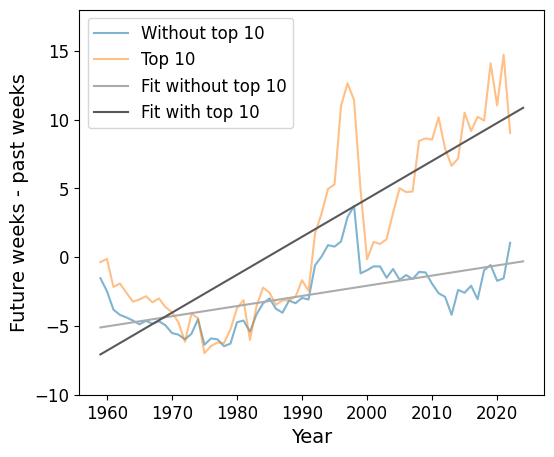

In [18]:
wo_top_10_future = billboard_hot_100[billboard_hot_100["top_position"] > 10].groupby(["year"])["future_weeks"].mean()
wo_top_10_past = billboard_hot_100[billboard_hot_100["top_position"] > 10].groupby(["year"])["past_weeks"].mean()

wo_top_10 = (wo_top_10_future - wo_top_10_past)
wo_top_10.plot(kind='line', figsize=(6, 5), label="Without top 10", alpha=0.5)

top_10_future = billboard_hot_100[billboard_hot_100["top_position"] <= 10].groupby(["year"])["future_weeks"].mean()
top_10_past = billboard_hot_100[billboard_hot_100["top_position"] <= 10].groupby(["year"])["past_weeks"].mean()

top_10 = (top_10_future - top_10_past)
top_10.plot(kind='line', figsize=(6, 5), label="Top 10", alpha=0.5)

model_wo_top_10 = pwlf.PiecewiseLinFit(wo_top_10.index.values, wo_top_10.values)
model_wo_top_10.fit(1)
model_top_10 = pwlf.PiecewiseLinFit(top_10.index.values, top_10.values)
model_top_10.fit(1)

slopes_wo_top_10 = []
slopes_top_10 = []

for i in range(1, 1001):
    # shuffle points and perform piecewise linear regression
    y_test_wo_top_10 = np.random.permutation(wo_top_10.values) 
    y_test_top_10 = np.random.permutation(top_10.values) 
    model_test_wo_top_10 = pwlf.PiecewiseLinFit(wo_top_10.index.values, y_test_wo_top_10)
    model_test_wo_top_10.fit(1)
    model_test_top_10 = pwlf.PiecewiseLinFit(top_10.index.values, y_test_top_10)
    model_test_top_10.fit(1)
    slopes_wo_top_10.append(model_test_wo_top_10.slopes[0])
    slopes_top_10.append(model_test_top_10.slopes[0])

# Compute 95% confidence interval (CI) for the observed statistic
lower_percentile = 2.5
upper_percentile = 97.5

ci_lower_wo_top_10 = np.percentile(slopes_wo_top_10, lower_percentile)
ci_upper_wo_top_10 = np.percentile(slopes_wo_top_10, upper_percentile)

ci_lower_top_10 = np.percentile(slopes_top_10, lower_percentile)
ci_upper_top_10 = np.percentile(slopes_top_10, upper_percentile)

print(f"Observed stat without top 10: {model_wo_top_10.slopes[0]}")
print(f"95% CI without top 10: ({ci_lower_wo_top_10:.2f}, {ci_upper_wo_top_10:.2f})")

print(f"Observed stat with top 10: {model_top_10.slopes[0]}")
print(f"95% CI with top 10: ({ci_lower_top_10:.2f}, {ci_upper_top_10:.2f})")

if model_wo_top_10.slopes[0] < ci_lower_wo_top_10 or model_wo_top_10.slopes[0] > ci_upper_wo_top_10:
    print(f"Observed stat {model_wo_top_10.slopes[0]} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed stat {model_wo_top_10.slopes[0]} is inside the 95% CI.")

if model_top_10.slopes[0] < ci_lower_top_10 or model_top_10.slopes[0] > ci_upper_top_10:
    print(f"Observed stat {model_top_10.slopes[0]} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed stat {model_top_10.slopes[0]} is inside the 95% CI.")

x_hat = np.linspace(1959, 2024, 100)
y_hat_wo_top_10 = model_wo_top_10.predict(x_hat)
y_hat_top_10 = model_top_10.predict(x_hat)

plt.plot(x_hat, y_hat_wo_top_10, label="Fit without top 10")
plt.plot(x_hat, y_hat_top_10, label="Fit with top 10")

print (f"R squared without top 10: {model_wo_top_10.r_squared()}")
print (f"R squared with top 10: {model_top_10.r_squared()}")
print(f"P values without top 10: {model_wo_top_10.p_values(method="non-linear")}")
print(f"P values with top 10: {model_top_10.p_values(method="non-linear")}")
plt.legend(loc="upper left")
plt.ylabel("Future weeks - past weeks")
plt.xlabel("Year")
plt.ylim([-10, 18])
plt.savefig("appendix/1.C.3.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### Plot all together

C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\3617660872.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='decade', y="max_weeks_on_chart", order=[str(decade) + "s" for decade in range(1960, 2020, 10)], data=billboard_hot_100_subset_B, ax=ax,
C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\3617660872.py:75: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_positions_max = pd.concat([top_positions_max, new_row_max])
C:\Users\cutie\AppData\Local\Temp\ipykernel_2012\3617660872.py:82: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. I

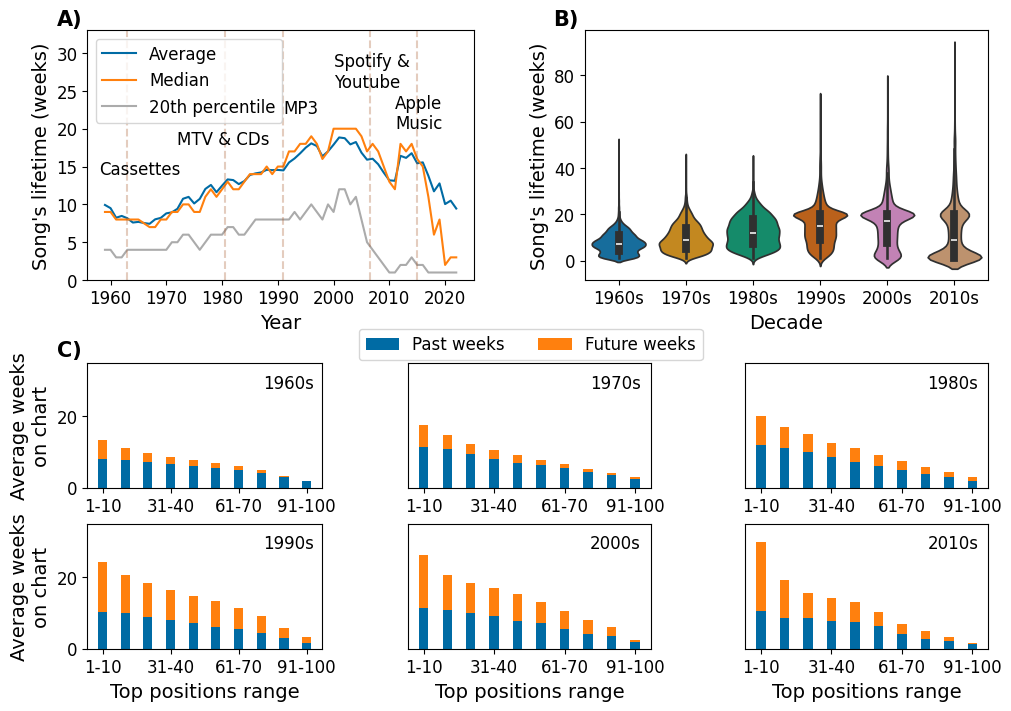

In [20]:
fig, axes = plt.subplot_mosaic([["A", "A", "A", "B", "B", "B"], ["C1", "C1", "C2", "C2", "C3", "C3"], ["C4", "C4", "C5", "C5", "C6", "C6"]], figsize=(10, 7),
    gridspec_kw={'height_ratios': [2, 1, 1], 'width_ratios': [1, 1, 1, 1, 1, 1]}, constrained_layout=True)

# Plot A
ax = axes['A']

billboard_hot_100_subset_A = billboard_hot_100[["artist", "song_name", "year", "max_weeks_on_chart"]].drop_duplicates()
avg_week_on_chart_yearly = billboard_hot_100_subset_A[["max_weeks_on_chart", "year"]].groupby(by="year").mean()
std_error = billboard_hot_100_subset_A[["year", "max_weeks_on_chart"]].groupby(by="year").sem()

median_weeks_on_chart_yearly = billboard_hot_100_subset_A[["max_weeks_on_chart", "year"]].groupby(by="year").median()
median_std_error = billboard_hot_100_subset_A[["year", "max_weeks_on_chart"]].groupby(by="year")["max_weeks_on_chart"].apply(
    std_error_of_median).rename("max_weeks_on_chart")

twntieth_weeks_on_chart_yearly = billboard_hot_100_subset_A[["max_weeks_on_chart", "year"]].groupby(by="year").quantile(0.2)

avg_week_on_chart_yearly.plot(kind='line', legend=False, ax=ax)
median_weeks_on_chart_yearly.plot(kind='line', legend=False, ax=ax)
twntieth_weeks_on_chart_yearly.plot(kind='line', legend=False, ax=ax)

ax.axvline(x = youtube_creation_date.year + ((spotify_creation_date.year - youtube_creation_date.year)/2),
                                color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = apple_music_creation_date.year, color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = mtv_launch_date.year + ((mtv_launch_date.year - cds_creation_date.year)/2), color=brown,
                                ls="dashed", alpha=0.3)
ax.axvline(x = mp3_creation_date.year, color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = cassettes_creation_date.year, color=brown, ls="dashed", alpha=0.3)

ax.text(youtube_creation_date.year - 5, 25.5, "Spotify &\nYoutube")
ax.text(apple_music_creation_date.year - 4, 20, "Apple\nMusic")
ax.text(mtv_launch_date.year - 9, 18, "MTV & CDs")
ax.text(mp3_creation_date.year, 22, "MP3")
ax.text(cassettes_creation_date.year - 5, 14, "Cassettes")

ax.set_xlabel("Year")
ax.set_ylabel("Song's lifetime (weeks)")
ax.legend(["Average", "Median", "20th percentile"], loc="upper left")
ax.set_ylim([0, 33])
ax.text(-0.08, 1.02, 'A)', transform=ax.transAxes, weight='bold', fontsize=15)

# Plot B
ax = axes['B']

billboard_hot_100_subset_B = billboard_hot_100[["artist", "song_name", "decade", "max_weeks_on_chart"]].drop_duplicates()
sns.violinplot(x='decade', y="max_weeks_on_chart", order=[str(decade) + "s" for decade in range(1960, 2020, 10)], data=billboard_hot_100_subset_B, ax=ax,
               palette="colorblind")

ax.set_xlabel("Decade")
ax.set_ylabel("Song's lifetime (weeks)")
ax.text(-0.08, 1.02, 'B)', transform=ax.transAxes, weight='bold', fontsize=15)

# Plot C
col_i = 0

for year in range(1960, 2020, 10):
    ax = axes[f'C{col_i + 1}']
    
    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    # take songs only from this decade
    songs_in_decade = billboard_hot_100[~(billboard_hot_100["artist"].isin(songs_from_other_decades["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_decades["song_name"]))]
    
    top_positions_max = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_future = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    top_positions_past = pd.DataFrame(columns=["top_positions_range", "avg_weeks"])
    for top_position in range(10, 110, 10):
        avg_max_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["max_weeks_on_chart"].first().mean()
        new_row_max = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_max_weeks}, index=[0])
        top_positions_max = pd.concat([top_positions_max, new_row_max])

        avg_future_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["future_weeks"].first().mean()
        new_row_future = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_future_weeks}, index=[0])
        top_positions_future = pd.concat([top_positions_future, new_row_future])

        avg_past_weeks = songs_in_decade[(songs_in_decade["top_position"] <= top_position) &\
            (songs_in_decade["top_position"] > top_position - 10)].groupby(
                ["artist", "song_name"])["past_weeks"].first().mean()
        new_row_past = pd.DataFrame({"top_positions_range": f"{top_position - 9}-{top_position}",
            "avg_weeks": avg_past_weeks}, index=[0])
        top_positions_past = pd.concat([top_positions_past, new_row_past])

    ind = np.arange(top_positions_max["top_positions_range"].shape[0])
    # bar_width = 0.24
    bar_width = 0.4
    ax.bar(ind + bar_width, top_positions_past["avg_weeks"], bar_width, label="Past weeks")
    ax.bar(ind + bar_width, top_positions_future["avg_weeks"], bar_width, label="Future weeks",
           bottom=top_positions_past["avg_weeks"])
    ax.text(0.75, 0.8, f"{year}s", transform=ax.transAxes)
    ax.set_ylim([0, 35])
    if col_i >= 3:
        ax.set_xlabel("Top positions range")
    if col_i % 3 == 0:
        ax.set_ylabel("Average weeks\non chart")
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.set_xticks(ind[::3] + bar_width, top_positions_max["top_positions_range"].tolist()[::3])
    if col_i != 0 and col_i != 3:
        ax.set_yticks([])
        ax.set_yticks([], minor=True)
        ax.yaxis.set_tick_params(labelbottom=False)

    # if col_i == 2:
    #     ax.legend(bbox_to_anchor=(1, 1.2), ncol=2)

    col_i += 1

lines_labels = [ax.get_legend_handles_labels() for ax in [axes["C1"]]]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend_bbox = (0.475, 0.465, 0.1, 0.1)
fig.legend(lines, labels, ncol=2, loc='center', bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)

axes['C1'].text(-0.13, 1.05, 'C)', transform=axes["C1"].transAxes, weight='bold', fontsize=15)

plt.savefig("fig1.jpg", format="jpg", bbox_inches='tight', dpi=300)

## Song trajectories

### Average trajectories per decade

In [39]:
import dateutil.parser

rows_to_add = []

for year in range(1960, 2020, 10):
    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]
    
    songs_in_decade = billboard_hot_100[(billboard_hot_100["year"] >= year) &\
        (billboard_hot_100["year"] < year + 10) & ~((billboard_hot_100["artist"].isin(songs_from_other_decades["artist"]) &\
            billboard_hot_100["song_name"].isin(songs_from_other_decades["song_name"])))][["artist", "song_name", "weeks_on_chart",
                "position", "first_day_of_the_week", "year", "top_position"]]
    grouped = songs_in_decade.groupby(["artist", "song_name"])

    min_first_week = songs_in_decade["first_day_of_the_week"].min().to_pydatetime()

    for name, group in grouped:
        max_week = group["first_day_of_the_week"].max().to_pydatetime()

        for row_index, row in group.iterrows():
            if row["first_day_of_the_week"] == max_week:
                week_date = row["first_day_of_the_week"] + timedelta(weeks=1)

                while week_date < dateutil.parser.parse(f"{year + 9}-12-31"):
                    rows_to_add.append({
                        "artist": row["artist"],
                        "song_name": row["song_name"],
                        "weeks_on_chart": row["weeks_on_chart"],
                        "position": 101,
                        "first_day_of_the_week": week_date,
                        "year": week_date.year,
                        "top_position": row["top_position"]
                    })
                    week_date += timedelta(weeks=1)

billboard_100_with_empty_weeks = pd.concat([billboard_hot_100[["artist", "song_name",
    "weeks_on_chart", "position", "first_day_of_the_week", "year", "top_position"]], pd.DataFrame(rows_to_add)], ignore_index=True)

billboard_100_with_empty_weeks["first_week"] = billboard_100_with_empty_weeks.groupby(["artist", "song_name"])["first_day_of_the_week"].transform("min")

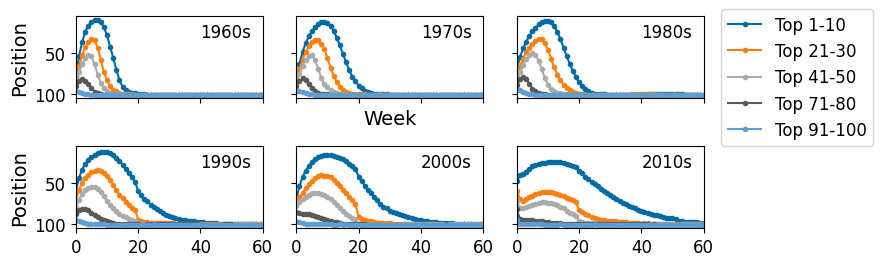

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(9, 3), sharey=True, sharex=True)

row_i = 0
col_i = 0

for year in [1960, 1970, 1980, 1990, 2000, 2010]:
    # all songs in the decade
    all_songs_in_decade = billboard_100_with_empty_weeks[(billboard_100_with_empty_weeks["year"] >= year) &\
        (billboard_100_with_empty_weeks["year"] < year + 10)][["artist", "song_name", "first_day_of_the_week", "top_position", "position",
            "first_week"]]

    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    for top_position, low_positions in [(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]:
        # songs that reached top 50 in the decade
        top_x_positions_in_decade = all_songs_in_decade[(all_songs_in_decade["top_position"] <= low_positions) &\
            (all_songs_in_decade["top_position"] >= top_position)][["artist", "song_name"]]

        # take songs only from this decade
        top_x_positions_in_decade = top_x_positions_in_decade[~(top_x_positions_in_decade["artist"].isin(songs_from_other_decades["artist"]) &\
            top_x_positions_in_decade["song_name"].isin(songs_from_other_decades["song_name"]))]

        # take all positions of the songs
        top_x_positions_in_decade = top_x_positions_in_decade[["artist", "song_name"]].drop_duplicates().merge(
            billboard_100_with_empty_weeks[["artist", "song_name",
                "position", "first_day_of_the_week", "first_week"]], on=["artist", "song_name"], how="left")

        min_first_week = top_x_positions_in_decade["first_day_of_the_week"].min().to_pydatetime()

        top_x_positions_in_decade["first_day_of_the_week"] = top_x_positions_in_decade.apply(lambda row:
            int(((min_first_week + timedelta(
                    days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

        top_x_positions_in_decade.set_index("first_day_of_the_week", inplace=True)
        top_x_positions_in_decade.sort_index(inplace=True)

        axes[row_i, col_i].plot(top_x_positions_in_decade.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', label=f"Top {top_position}-{low_positions}", ms=3)

    axes[row_i, col_i].text(40, 30, f"{year}s")
    if row_i == 0 and col_i == 1:
        axes[row_i, col_i].set_xlabel("Week")
    if col_i == 0:
        axes[row_i, col_i].set_ylabel("Position")
    if row_i == 1 and col_i == 2:
        axes[row_i, col_i].legend(bbox_to_anchor=(1.05, 0.9))
    axes[row_i, col_i].set_xlim([0, 60])

    col_i += 1
    if col_i == 3:
        col_i = 0
        row_i += 1

fig.tight_layout()
plt.gca().invert_yaxis()
plt.show()

  0%|          | 0/6 [00:00<?, ?it/s]C:\Users\cutie\AppData\Local\Temp\ipykernel_14568\1152089771.py:54: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_data = pd.concat([model_data, pd.DataFrame({"decade": f"{year}s", "top_position": f"Top {top_position}-{low_positions}",
100%|██████████| 6/6 [00:12<00:00,  2.16s/it]
C:\Users\cutie\AppData\Local\Temp\ipykernel_14568\1152089771.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[row_i, col_i].set_xticklabels(labels)
100%|██████████| 6/6 [00:13<00:00,  2.25s/it]


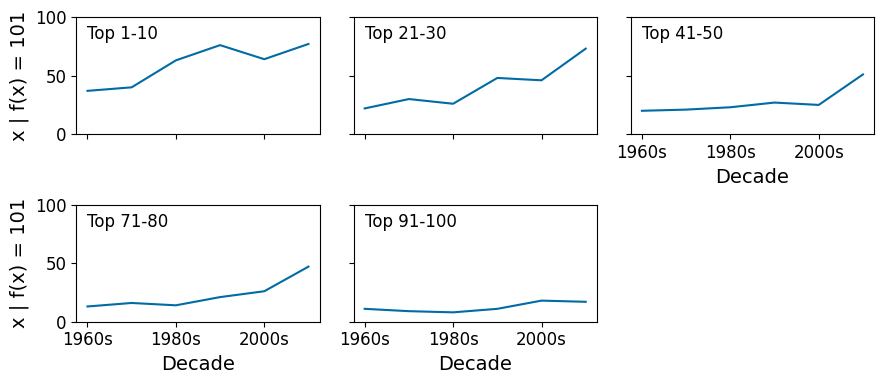

In [41]:
from tqdm import tqdm
from scipy import interpolate

fig, axes = plt.subplots(2, 3, figsize=(9, 4), sharey=True, sharex=True)

row_i = 0
col_i = 0
models = []
model_data = pd.DataFrame(columns=["decade", "top_position", "avg_position", "first_day_of_the_week"])

for top_position, low_positions in [(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]:
    areas = []
    # songs that reached top 50 in the decade
    top_x_positions = billboard_100_with_empty_weeks[(billboard_100_with_empty_weeks["top_position"] <= low_positions) &\
        (billboard_100_with_empty_weeks["top_position"] >= top_position)][["artist", "song_name",
            "first_day_of_the_week", "top_position", "position", "first_week", "year"]]

    for year in tqdm([1960, 1970, 1980, 1990, 2000, 2010]):
        songs_from_decade = top_x_positions[(top_x_positions["year"] >= year) &\
        (top_x_positions["year"] < year + 10)][["artist", "song_name"]]

        # songs from other decades
        songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
            (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

        # songs that reached top 50 in the decade
        top_x_positions_in_decade = top_x_positions[(top_x_positions["top_position"] <= low_positions) &\
            (top_x_positions["top_position"] >= top_position)][["artist", "song_name"]]

        # take songs only from this decade
        top_x_positions_in_decade = top_x_positions_in_decade[~(top_x_positions_in_decade["artist"].isin(songs_from_other_decades["artist"]) &\
            top_x_positions_in_decade["song_name"].isin(songs_from_other_decades["song_name"]))]

        # take all positions of the songs
        top_x_positions_in_decade = top_x_positions_in_decade[["artist", "song_name"]].drop_duplicates().merge(
            billboard_100_with_empty_weeks[["artist", "song_name",
                "position", "first_day_of_the_week", "first_week"]], on=["artist", "song_name"], how="left")

        min_first_week = top_x_positions_in_decade["first_day_of_the_week"].min().to_pydatetime()

        top_x_positions_in_decade["first_day_of_the_week"] = top_x_positions_in_decade.apply(lambda row:
            int(((min_first_week + timedelta(
                    days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

        top_x_positions_in_decade.set_index("first_day_of_the_week", inplace=True)
        top_x_positions_in_decade.sort_index(inplace=True)

        avg_traj = top_x_positions_in_decade.groupby("first_day_of_the_week")["position"].mean()
        x = avg_traj.index
        y = avg_traj.values
        f = interpolate.interp1d(y, x, bounds_error=False, fill_value="extrapolate")
        x_cross_101 = f(101)
        areas.append(x_cross_101)
        model_data = pd.concat([model_data, pd.DataFrame({"decade": f"{year}s", "top_position": f"Top {top_position}-{low_positions}",
            "avg_position": y, "first_day_of_the_week": x})])

    model = pwlf.PiecewiseLinFit(range(1960, 2020, 10), areas)
    model.fit(1)
    models.append(model)
    axes[row_i, col_i].plot(range(1960, 2020, 10), areas)
    axes[row_i, col_i].text(1960, 81, f"Top {top_position}-{low_positions}")
    if row_i == 1 and col_i == 0:
        labels = [item.get_text() + 's' for item in axes[row_i, col_i].get_xticklabels()]
        axes[row_i, col_i].set_xticklabels(labels)

    if row_i == 1 or ((row_i == 0) and (col_i == 2)):
        axes[row_i, col_i].set_xlabel("Decade")
        axes[row_i, col_i].xaxis.set_tick_params(labelbottom=True)
        axes[row_i, col_i].xaxis.set_major_locator(plt.MaxNLocator(3))
        for tk in axes[row_i, col_i].get_xticklabels():
            tk.set_visible(True)

    if col_i == 0:
        axes[row_i, col_i].set_ylabel("x | f(x) = 101")

    col_i += 1
    if col_i == 3:
        col_i = 0
        row_i += 1

plt.ylim(0, 100)
fig.tight_layout()
fig.delaxes(axes[1, 2])
plt.savefig("appendix/2.C.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

In [42]:
shuffled_slopes = {"1-10": [], "21-30": [], "41-50": [], "71-80": [], "91-100": []}

for i in tqdm(range(1, 1001)):
    data_copy = model_data.copy()
    data_copy["avg_position"] = np.random.permutation(data_copy["avg_position"].values)
    for j, (top_position, low_positions) in enumerate([(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]):
        areas = []
        for year in range(1960, 2020, 10):
            data_copy_decade = data_copy[(data_copy["top_position"] == f"Top {top_position}-{low_positions}") &\
                (data_copy["decade"] == f"{year}s")][["first_day_of_the_week", "avg_position"]].set_index("first_day_of_the_week")
            data_copy_decade.sort_index(inplace=True)
            x = data_copy_decade.index
            y = data_copy_decade["avg_position"].values
            f = interpolate.interp1d(y, x, bounds_error=False, fill_value="extrapolate")
            x_cross_101 = f(101)
            areas.append(x_cross_101)           
        model = pwlf.PiecewiseLinFit(range(1960, 2020, 10), areas)
        model.fit(1)
        shuffled_slopes[f"{top_position}-{low_positions}"].append(model.slopes[0])

# Compute 95% confidence intervals for each statistic
lower_percentile = 2.5
upper_percentile = 97.5

for j, (top_position, low_positions) in enumerate([(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]):
    ci_lower = np.percentile(shuffled_slopes[f"{top_position}-{low_positions}"], lower_percentile)
    ci_upper = np.percentile(shuffled_slopes[f"{top_position}-{low_positions}"], upper_percentile)
    print(f"Top {top_position}-{low_positions}: {models[j].slopes[0]}")
    print(f"95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")
    if models[j].slopes[0] < ci_lower or models[j].slopes[0] > ci_upper:
        print(f"Observed slope {models[j].slopes[0]} was outside the 95% CI (indicating significance).")
    else:
        print(f"Observed slope {models[j].slopes[0]} was inside the 95% CI.")


100%|██████████| 1000/1000 [01:33<00:00, 10.70it/s]

Top 1-10: 0.8142857142857141
95% CI: (-0.02, 0.02)
Observed slope 0.8142857142857141 was outside the 95% CI (indicating significance).
Top 21-30: 0.9285714285714289
95% CI: (-0.02, 0.01)
Observed slope 0.9285714285714289 was outside the 95% CI (indicating significance).
Top 41-50: 0.4885714285714283
95% CI: (-0.01, 0.01)
Observed slope 0.4885714285714283 was outside the 95% CI (indicating significance).
Top 71-80: 0.5914285714285712
95% CI: (-0.01, 0.02)
Observed slope 0.5914285714285712 was outside the 95% CI (indicating significance).
Top 91-100: 0.1714285714285713
95% CI: (-0.01, 0.01)
Observed slope 0.1714285714285713 was outside the 95% CI (indicating significance).


### Archtypes

In [43]:
from tqdm import tqdm
from datetime import datetime, timedelta
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from pandas.plotting import table

In [44]:
billboard_hot_100["max_weeks_on_chart"] = billboard_hot_100.groupby(["artist", "song_name"])["weeks_on_chart"].transform("max")

billboard_hot_100["first_position"] = billboard_hot_100.sort_values(
    by="first_day_of_the_week").groupby(["artist", "song_name"])[["position", "first_day_of_the_week"]].transform("first")["position"]
billboard_hot_100["last_position"] = billboard_hot_100.sort_values(
    by="first_day_of_the_week").groupby(["artist", "song_name"])[["position", "first_day_of_the_week"]].transform("last")["position"]

billboard_hot_100_copy = billboard_hot_100.copy()
billboard_hot_100_ml = billboard_hot_100.groupby(
    ["artist", "song_name"])[["past_weeks", "top_position", "future_weeks", "max_weeks_on_chart", "year", "first_position", "last_position"]].first().reset_index()

In [45]:
features = ["past_weeks", "top_position", "future_weeks", "max_weeks_on_chart", "first_position", "last_position"]

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(billboard_hot_100_ml[features])

model = KMeans(n_clusters=5, n_init="auto", random_state=1)
model.fit(X)

y_clusters = model.predict(X)

billboard_hot_100_ml["cluster"] = y_clusters
billboard_hot_100_new = billboard_hot_100_ml[["artist", "song_name", "cluster"]].merge(billboard_hot_100_copy, on=["artist", "song_name"], how="left")

from numpy import unique

unique_clusters = unique(y_clusters)

In [47]:
# classify clusters
cluster_statistics = {}

for cluster in unique_clusters:
    songs_from_cluster = billboard_hot_100_new[billboard_hot_100_new['cluster'] == cluster].copy()
    cluster_statistics[cluster] = songs_from_cluster[["weeks_on_chart", "past_weeks", "future_weeks", "first_position", "last_position", "top_position"]].describe(
        percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9])

brief_cluster = np.argmin([cluster_statistics[i].loc['75%'].loc["weeks_on_chart"] for i in unique_clusters])
start_high_cluster = np.argmin([cluster_statistics[i].loc['75%'].loc["first_position"] for i in unique_clusters])
end_high_cluster = np.argmin([cluster_statistics[i].loc['75%'].loc["last_position"] + cluster_statistics[i].loc['75%'].loc["future_weeks"] for i in unique_clusters])
normal_cluster = np.argmax([cluster_statistics[i].loc['75%'].loc["last_position"] + cluster_statistics[i].loc['75%'].loc["weeks_on_chart"] for i in unique_clusters])
longlasting_cluster = np.argmax([cluster_statistics[i].loc['75%'].loc["weeks_on_chart"] for i in unique_clusters])
print("Brief " + str(brief_cluster))
print("High-start " + str(start_high_cluster))
print("High-end " + str(end_high_cluster))
print("Normal " + str(normal_cluster))
print("Long-lasting " + str(longlasting_cluster))

# to show that the other percentiles are as good
for other_percentile in ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", '90%']:
    brief_cluster_test = np.argmin([cluster_statistics[i].loc[other_percentile].loc["weeks_on_chart"] for i in unique_clusters])
    start_high_cluster_test = np.argmin([cluster_statistics[i].loc[other_percentile].loc["first_position"] for i in unique_clusters])
    end_high_cluster_test = np.argmin([cluster_statistics[i].loc[other_percentile].loc["last_position"] + cluster_statistics[i].loc[other_percentile].loc["future_weeks"] for i in unique_clusters])
    normal_cluster_test = np.argmax([cluster_statistics[i].loc[other_percentile].loc["last_position"] + cluster_statistics[i].loc[other_percentile].loc["weeks_on_chart"] for i in unique_clusters])
    longlasting_cluster_test = np.argmax([cluster_statistics[i].loc[other_percentile].loc["weeks_on_chart"] for i in unique_clusters])

    if brief_cluster_test != brief_cluster:
        print("Brief does not match for " + other_percentile)
    if start_high_cluster_test != start_high_cluster:
        print("High-start does not match for " + other_percentile)
    if end_high_cluster_test != end_high_cluster:
        print("High-end does not match for " + other_percentile)
    if normal_cluster_test != normal_cluster:
        print("Normal does not match for " + other_percentile + " instead got " + str(normal_cluster_test))
    if longlasting_cluster_test != longlasting_cluster:
        print("Long-lasting does not match for " + other_percentile)


Brief 0
High-start 1
High-end 2
Normal 4
Long-lasting 3
Normal does not match for 90% instead got 1


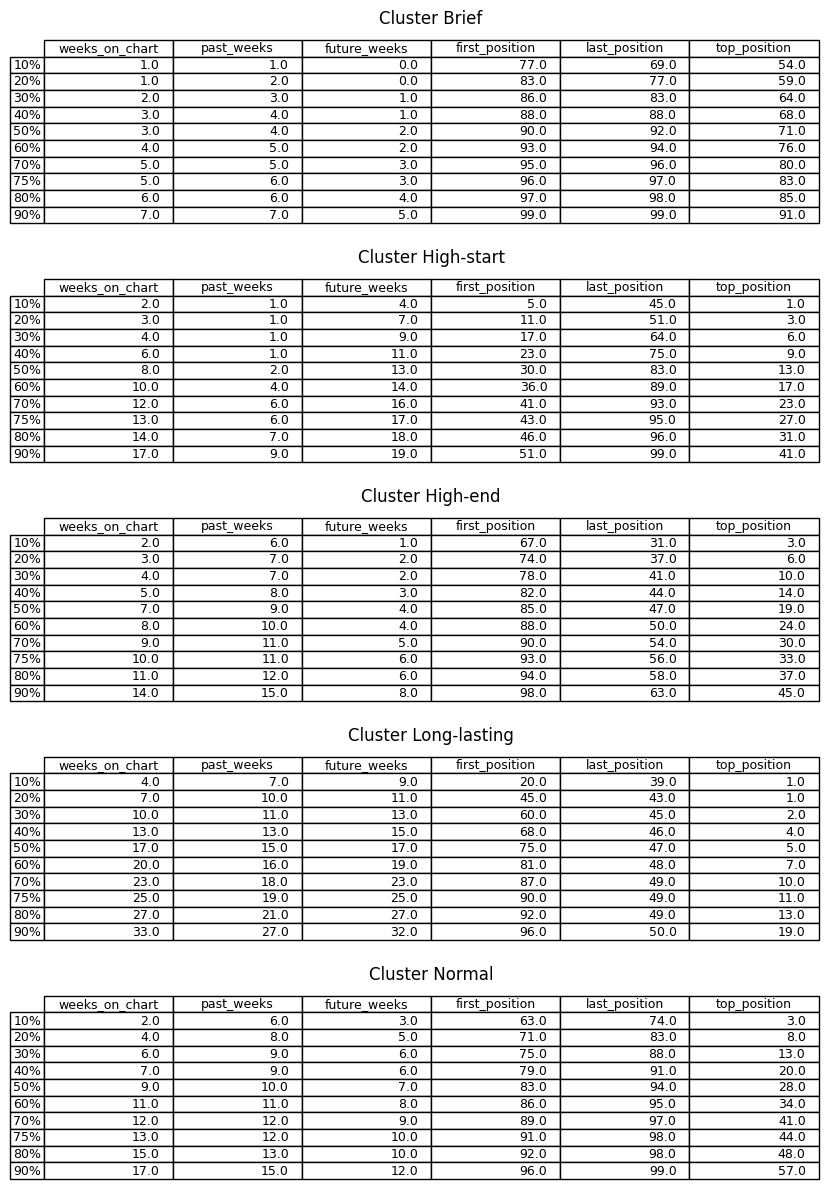

In [48]:

fig, axes = plt.subplots(5, 1, figsize=(10, 15))

cluster_names = ["Brief", "High-start", "High-end", "Long-lasting", "Normal"]

for i, cluster in enumerate(unique_clusters):
    ax = axes[i]
    ax.axis('off')
    table(ax, cluster_statistics[cluster].loc[["10%", "20%", "30%", "40%", "50%", "60%", "70%", "75%", "80%", "90%"]], loc="center")
    ax.set_title(f"Cluster {cluster_names[cluster]}", y=1)

plt.savefig("appendix/2.B.2.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()


In [49]:
def map_cluster_name(cluster_nr):
    if cluster_nr == brief_cluster:
        return "Brief"
    if cluster_nr == start_high_cluster:
        return "High-start"
    if cluster_nr == end_high_cluster:
        return "High-end"
    if cluster_nr == normal_cluster:
        return "Climbing"
    return "Long-lasting"

billboard_hot_100_new["cluster"] = billboard_hot_100_new["cluster"].map(lambda x: map_cluster_name(x))

In [50]:
rows_to_add = []

grouped = billboard_hot_100_new.groupby(["artist", "song_name"])

for name, group in tqdm(grouped):
    max_week = group["first_day_of_the_week"].max()

    for row_index, row in group.iterrows():
        if row["first_day_of_the_week"] == max_week:
            week = row["first_day_of_the_week"] + timedelta(weeks=1)

            while week <= (max_week + timedelta(weeks=50)):
                rows_to_add.append({
                    "artist": row["artist"],
                    "song_name": row["song_name"],
                    "weeks_on_chart": row["weeks_on_chart"],
                    "position": 101,
                    "first_day_of_the_week": week,
                    "top_position": row["top_position"],
                    "first_position": row["first_position"],
                    "last_position": row["last_position"],
                    "past_weeks": row["past_weeks"],
                    "future_weeks": row["future_weeks"],
                    "max_weeks_on_chart": row["max_weeks_on_chart"],
                    "cluster": row["cluster"],
                    "year": row["year"]
                })
                week += timedelta(weeks=1)

billboard_100_with_empty_weeks_ml = pd.concat([billboard_hot_100_new[["artist", "song_name",
    "weeks_on_chart", "position", "first_day_of_the_week", "top_position",
    "first_position", "last_position", "past_weeks", "future_weeks",
    "max_weeks_on_chart", "cluster", "year"]], pd.DataFrame(rows_to_add)], ignore_index=True)
billboard_100_with_empty_weeks_ml["first_week"] = billboard_100_with_empty_weeks_ml.groupby(["artist", "song_name"])["first_day_of_the_week"].transform("min")

100%|██████████| 30147/30147 [01:10<00:00, 428.38it/s]


100%|██████████| 5/5 [00:22<00:00,  4.40s/it]


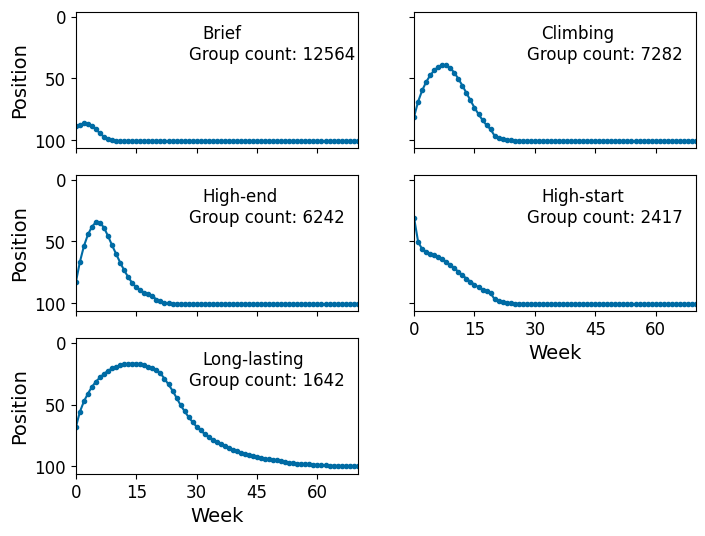

In [51]:
fig, axes = plt.subplots(math.ceil(len(unique_clusters)/2), 2, figsize=(8, 6), sharex=True, sharey=True)
row_i, col_i = 0, 0
unique_clusters = unique(billboard_100_with_empty_weeks_ml['cluster'])
models = {}

for cluster in tqdm(unique_clusters):
    songs_from_cluster = billboard_100_with_empty_weeks_ml[billboard_100_with_empty_weeks_ml['cluster'] == cluster].copy()
        
    min_first_week = songs_from_cluster["first_day_of_the_week"].min().to_pydatetime()
    songs_from_cluster["first_day_of_the_week"] = songs_from_cluster.apply(lambda row:
        int(((min_first_week + timedelta(
                days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

    songs_from_cluster.set_index("first_day_of_the_week", inplace=True)
    songs_from_cluster.sort_index(inplace=True)

    axes[row_i, col_i].plot(songs_from_cluster.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', ms=3)
    
    x = songs_from_cluster.groupby("first_day_of_the_week")["position"].mean().index
    y = songs_from_cluster.groupby("first_day_of_the_week")["position"].mean().values

    pwlf_cluster = pwlf.PiecewiseLinFit(x[0:70], y[0:70])
    models[cluster] = pwlf_cluster, x[0:70], y[0:70]
    
    number_of_songs = songs_from_cluster[["artist", "song_name"]].drop_duplicates().shape[0]
    axes[row_i, col_i].text(0.4, 0.65, f"Group count: {number_of_songs}", transform=axes[row_i, col_i].transAxes)
        
    axes[row_i, col_i].text(0.45, 0.8, f"{cluster}", transform=axes[row_i, col_i].transAxes)
    if row_i == 2 or ((row_i == 1) and (col_i == 1)):
        axes[row_i, col_i].set_xlabel("Week")
        axes[row_i, col_i].xaxis.set_tick_params(labelbottom=True)
        axes[row_i, col_i].xaxis.set_major_locator(plt.MaxNLocator(6))
        for tk in axes[row_i, col_i].get_xticklabels():
                tk.set_visible(True)

    if col_i == 0:
        axes[row_i, col_i].set_ylabel("Position")

    col_i += 1
    if col_i == 2:
        col_i = 0
        row_i += 1

fig.delaxes(axes[2, 1])
plt.xlim(0, 70)
plt.gca().invert_yaxis()
plt.show()

 20%|██        | 1/5 [00:00<00:01,  2.94it/s]

P values for cluster Brief: [7.44724889e-118 1.04354031e-009 3.88424931e-040 3.98668419e-049
 1.17184657e-046 5.35770736e-078]


 40%|████      | 2/5 [00:00<00:01,  2.88it/s]

P values for cluster Climbing: [3.51034620e-64 3.92664152e-33 5.99214149e-46 3.27029352e-52
 3.53528749e-55 1.84948388e-74]


 60%|██████    | 3/5 [00:00<00:00,  3.08it/s]

P values for cluster High-end: [5.34173186e-54 1.38153136e-26 1.33063823e-35 1.58440025e-44
 7.97330500e-44 8.40949561e-65]


 80%|████████  | 4/5 [00:01<00:00,  3.12it/s]

P values for cluster High-start: [1.47231053e-53 3.64712087e-32 3.93131396e-29 1.39662717e-71
 9.22682899e-36 9.36930547e-85]


100%|██████████| 5/5 [00:01<00:00,  3.15it/s]

P values for cluster Long-lasting: [5.08882084e-38 2.65520928e-21 5.72638448e-36 2.14995711e-31
 3.27593155e-46 8.54201172e-56]


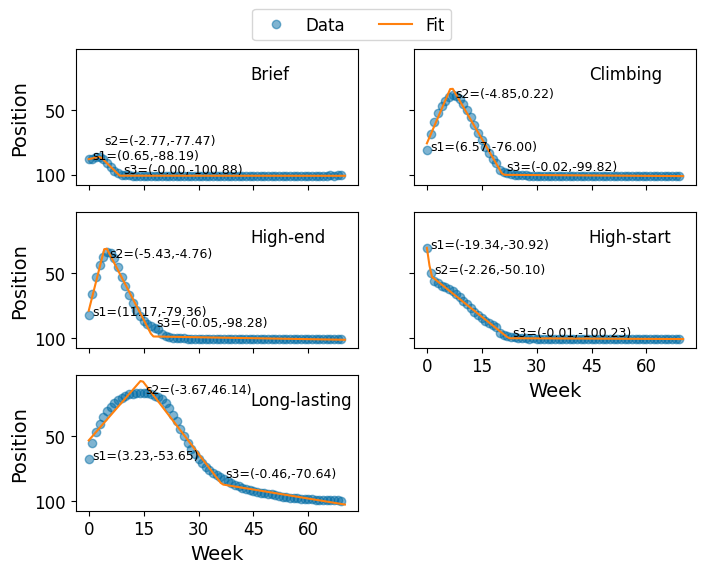

In [52]:

fig, axes = plt.subplots(math.ceil(len(unique_clusters)/2), 2, figsize=(8, 6), sharex=True, sharey=True)
row_i, col_i = 0, 0
unique_clusters = unique(billboard_100_with_empty_weeks_ml['cluster'])

for cluster in tqdm(unique_clusters):
    model, x, y = models[cluster]
    x_hat = np.linspace(0, 70, 100)
    values = model.fit(3)
    y_hat = model.predict(x_hat)
    axes[row_i, col_i].plot(x, y, 'o', alpha=0.5)
    axes[row_i, col_i].plot(x_hat, y_hat, '-')
    print(f"P values for cluster {cluster}: {model.p_values(method="non-linear")}")
    slopes = model.calc_slopes()
    slopes = -1 * slopes
    intercepts = model.intercepts
    intercepts = -1 * intercepts

    axes[row_i, col_i].text(0.62, 0.78, f"{cluster}", transform=axes[row_i, col_i].transAxes)

    for i, (slope, intercept) in enumerate(zip(slopes, intercepts)):
        if (cluster == "Brief") and (i == 1):
            axes[row_i, col_i].text(values[i] + 1, y[np.ceil(values[i].astype(int))] - 10, f"s{i+1}=({slope:.2f},{intercept:.2f})", fontsize=9)
        else:
            axes[row_i, col_i].text(values[i] + 1, y[np.ceil(values[i].astype(int))], f"s{i+1}=({slope:.2f},{intercept:.2f})", fontsize=9)

    if row_i == 2 or ((row_i == 1) and (col_i == 1)):
        axes[row_i, col_i].set_xlabel("Week")
        axes[row_i, col_i].xaxis.set_tick_params(labelbottom=True)
        axes[row_i, col_i].xaxis.set_major_locator(plt.MaxNLocator(6))
        for tk in axes[row_i, col_i].get_xticklabels():
                tk.set_visible(True)

    if col_i == 0:
        axes[row_i, col_i].set_ylabel("Position")
    
    col_i += 1
    if col_i == 2:
        col_i = 0
        row_i += 1

fig.delaxes(axes[2, 1])
fig.legend(["Data", "Fit"], bbox_to_anchor=(0.47, 0.92), loc='center', ncols=2)

plt.gca().invert_yaxis()
plt.savefig("appendix/2.B.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()


### Archetypes over time

<Figure size 600x400 with 0 Axes>

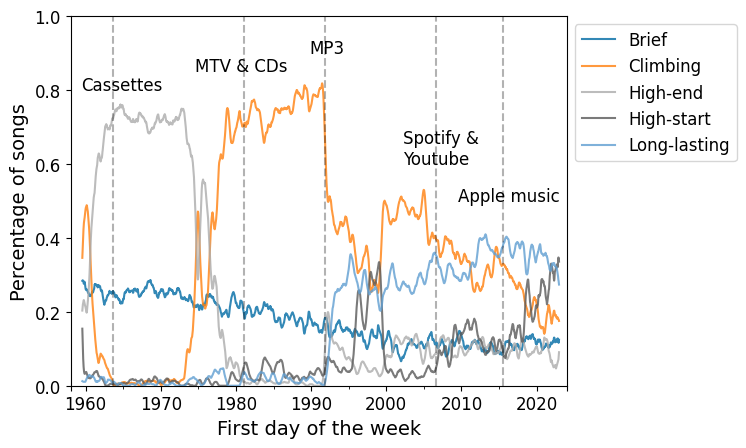

In [53]:
plt.figure(figsize=(6, 4))

billboard_hot_100_new_full_data = billboard_hot_100_new
billboard_hot_100_new_full_data.groupby(["first_day_of_the_week"])["cluster"].value_counts(
    normalize=True).unstack(fill_value=0).stack().sort_index().unstack().rolling(window=30).mean().plot(alpha=0.8)

plt.axvline(x = youtube_creation_date + timedelta(days=(spotify_creation_date - youtube_creation_date).days/2),
                                color='black', ls="dashed", alpha=0.3)
plt.axvline(x = apple_music_creation_date, color='black', ls="dashed", alpha=0.3)
plt.axvline(x = mtv_launch_date + timedelta(days=(mtv_launch_date - cds_creation_date).days/2), color='black',
                                ls="dashed", alpha=0.3)
plt.axvline(x = mp3_creation_date, color='black', ls="dashed", alpha=0.3)
plt.axvline(x = cassettes_creation_date, color="black", ls="dashed", alpha=0.3)

plt.text(youtube_creation_date - timedelta(weeks=150), 0.6, "Spotify &\nYoutube")
plt.text(apple_music_creation_date - timedelta(weeks=310), 0.5, "Apple music")
plt.text(mtv_launch_date - timedelta(weeks=370), 0.85, "MTV & CDs")
plt.text(mp3_creation_date - timedelta(weeks=110), 0.9, "MP3")
plt.text(cassettes_creation_date - timedelta(weeks=220), 0.8, "Cassettes")

plt.ylabel("Percentage of songs")
plt.xlabel("First day of the week")
plt.xlim(datetime(1958, 1, 1), datetime(2024, 1, 1))
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

C:\Users\cutie\AppData\Local\Temp\ipykernel_14568\3792942036.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


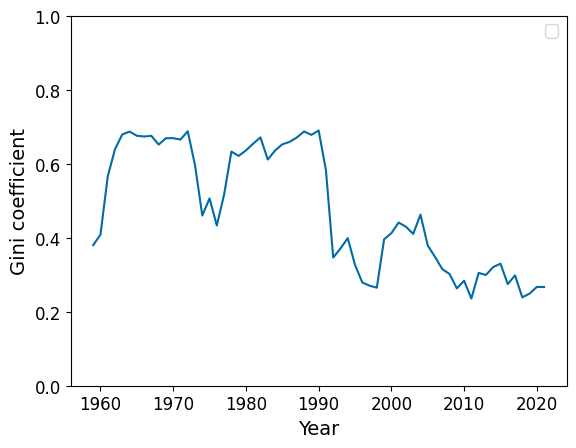

In [54]:
# gini coefficient to show inequality in the clusters

cluster_data = billboard_hot_100_new_full_data.groupby(["year"])["cluster"].value_counts(
    normalize=True).unstack(fill_value=0).stack().sort_index().unstack()

gini_coefficients = []

for year in range(1959, 2022):
    cluster_data_year = cluster_data.loc[year]

    gini_coefficients.append(gini_coefficient(cluster_data_year))

plt.plot(range(1959, 2022), gini_coefficients)
plt.ylabel("Gini coefficient")
plt.xlabel("Year")
plt.legend()
plt.ylim(0, 1)
plt.savefig("appendix/2.A.1.jpg", format="jpg", dpi=300, bbox_inches="tight")

plt.show()

Observed difference: 18.811578094624952
95% CI: (-9.57, 9.92)
Observed difference was outside the 95% CI (indicating significance).


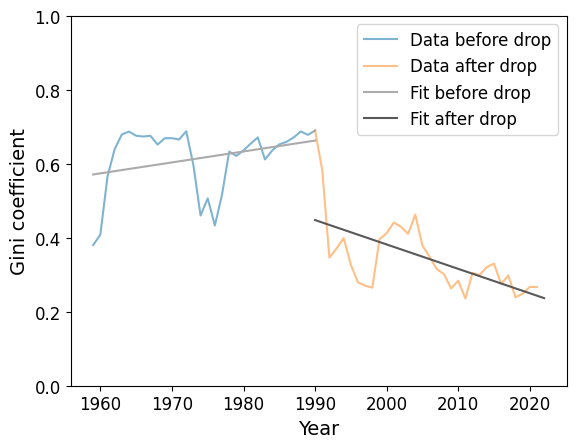

In [55]:
# gini coefficient to show inequality in the clusters

cluster_data = billboard_hot_100_new_full_data.groupby(["year"])["cluster"].value_counts(
    normalize=True).unstack(fill_value=0).stack().sort_index().unstack()

gini_coefficients = []

for year in range(1959, 2022):
    cluster_data_year = cluster_data.loc[year]

    gini_coefficients.append(gini_coefficient(cluster_data_year))

x1 = range(1959, 1991)
x2 = range(1990, 2022)
y1 = gini_coefficients[:len(x1)]
y2 = gini_coefficients[-len(x2):]
model1 = pwlf.PiecewiseLinFit(x1, y1)
model1.fit(1)
x_hat1 = np.linspace(1959, 1990, 100)
y_hat1 = model1.predict(x_hat1)
model2 = pwlf.PiecewiseLinFit(x2, y2)
model2.fit(1)
x_hat2 = np.linspace(1990, 2022, 100)
y_hat2 = model2.predict(x_hat2)

intercept1 = model1.intercepts[0]
intercept2 = model2.intercepts[0]
obs_diff = intercept2 - intercept1
diffs = []

for i in range (1, 1001):
    shuffled_y1 = np.random.permutation(y1)
    shuffled_y2 = np.random.permutation(y2)
    model1_test = pwlf.PiecewiseLinFit(x1, shuffled_y1)
    model1_test.fit(1)
    model2_test = pwlf.PiecewiseLinFit(x2, shuffled_y2)
    model2_test.fit(1)
    diffs.append(model1_test.intercepts[0] - model2_test.intercepts[0])

lower_percentile = 2.5
upper_percentile = 97.5

ci_lower = np.percentile(diffs, lower_percentile)
ci_upper = np.percentile(diffs, upper_percentile)

print(f"Observed difference: {obs_diff}")
print(f"95% CI: ({ci_lower:.2f}, {ci_upper:.2f})")
if obs_diff < ci_lower or obs_diff > ci_upper:
    print("Observed difference was outside the 95% CI (indicating significance).")
else:
    print("Observed difference was inside the 95% CI.")

plt.plot(x1, y1, alpha=0.5, label="Data before drop")
plt.plot(x2, y2, alpha=0.5, label="Data after drop")
plt.plot(x_hat1, y_hat1, label="Fit before drop")
plt.plot(x_hat2, y_hat2, label="Fit after drop")
plt.ylabel("Gini coefficient")
plt.xlabel("Year")
plt.legend()
plt.ylim(0, 1)
plt.savefig("appendix/2.A.2.jpg", format="jpg", dpi=300, bbox_inches="tight")

plt.show()

### Plotted together

100%|██████████| 5/5 [00:21<00:00,  4.25s/it]
C:\Users\cutie\AppData\Local\Temp\ipykernel_14568\3359850472.py:160: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig2.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_14568\3359850472.py:160: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig2.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_14568\3359850472.py:160: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig2.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_14568\3359850472.py:160: UserWarning: constrained_layout not applied because axes 

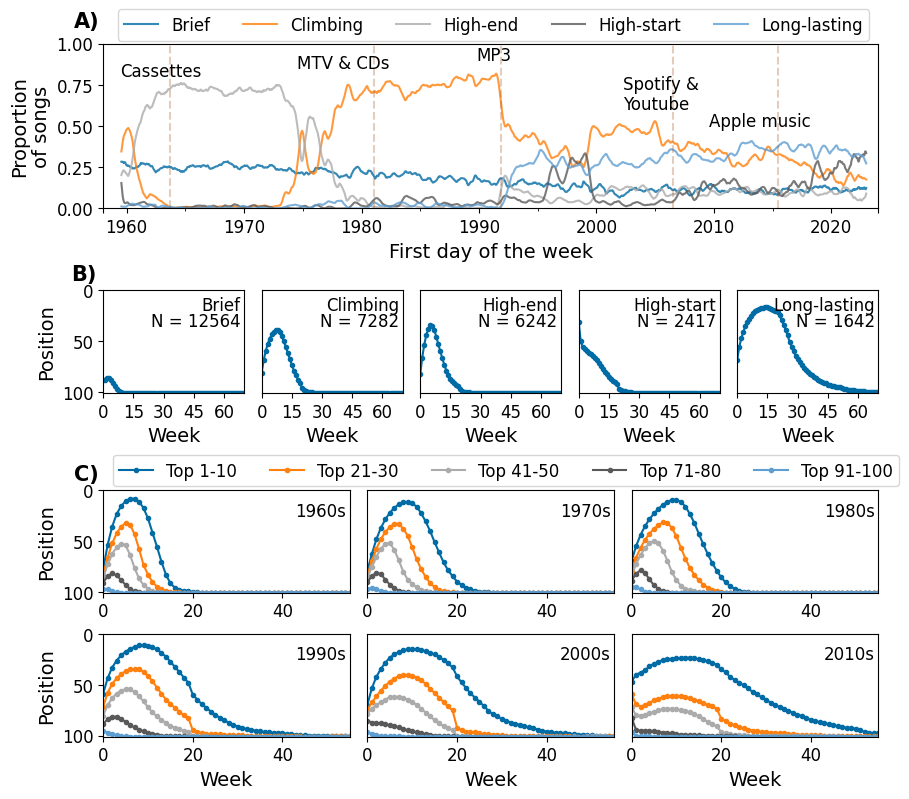

In [56]:
fig, axes = plt.subplot_mosaic([["A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A"],
                                [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
                                ["B1", "B1", "B1", "B2", "B2", "B2", "B3", "B3", "B3", "B4", "B4", "B4", "B5", "B5", "B5"],
                                [".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", ".", "."],
                                ["C1", "C1", "C1", "C1", "C1", "C2", "C2", "C2", "C2", "C2", "C3", "C3", "C3", "C3", "C3"],
                                ["C4", "C4", "C4", "C4", "C4", "C5", "C5", "C5", "C5", "C5", "C6", "C6", "C6", "C6", "C6"]], figsize=(10, 9),
    gridspec_kw={'height_ratios': [1.6, 0.001, 1, 0.15, 1, 1], 'width_ratios': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                 'wspace': 0.5, 'hspace': 0.5}, constrained_layout=True)

# Plot A

ax = axes['A']

billboard_hot_100_new_full_data = billboard_hot_100_new
billboard_hot_100_new_full_data.groupby(["first_day_of_the_week"])["cluster"].value_counts(
    normalize=True).unstack(fill_value=0).stack().sort_index().unstack().rolling(window=30).mean().plot(alpha=0.8, ax=ax, legend=False).set(xlabel=None)

ax.axvline(x = youtube_creation_date + timedelta(days=(spotify_creation_date - youtube_creation_date).days/2),
                                color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = apple_music_creation_date, color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = mtv_launch_date + timedelta(days=(mtv_launch_date - cds_creation_date).days/2), color=brown,
                                ls="dashed", alpha=0.3)
ax.axvline(x = mp3_creation_date, color=brown, ls="dashed", alpha=0.3)
ax.axvline(x = cassettes_creation_date, color=brown, ls="dashed", alpha=0.3)

ax.text(youtube_creation_date - timedelta(weeks=150), 0.6, "Spotify &\nYoutube")
ax.text(apple_music_creation_date - timedelta(weeks=310), 0.5, "Apple music")
ax.text(mtv_launch_date - timedelta(weeks=370), 0.85, "MTV & CDs")
ax.text(mp3_creation_date - timedelta(weeks=110), 0.9, "MP3")
ax.text(cassettes_creation_date - timedelta(weeks=220), 0.8, "Cassettes")

ax.set_ylabel("Proportion\nof songs")
ax.set_xlabel("First day of the week")
ax.set_xlim(datetime(1958, 1, 1), datetime(2024, 1, 1))
ax.set_ylim(0, 1)
ax.legend(loc='upper left', bbox_to_anchor=(0.008, 1.26), ncol=5)

axes['A'].text(-0.038, 1.1, 'A)', transform=axes['A'].transAxes, weight='bold', fontsize=15)

# Plot B

col_i = 0
unique_clusters = unique(billboard_100_with_empty_weeks_ml['cluster'])

for cluster in tqdm(unique_clusters):
    ax = axes[f'B{col_i + 1}']
    songs_from_cluster = billboard_100_with_empty_weeks_ml[billboard_100_with_empty_weeks_ml['cluster'] == cluster].copy()
        
    min_first_week = songs_from_cluster["first_day_of_the_week"].min().to_pydatetime()
    songs_from_cluster["first_day_of_the_week"] = songs_from_cluster.apply(lambda row:
        int(((min_first_week + timedelta(
                days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

    songs_from_cluster.set_index("first_day_of_the_week", inplace=True)
    songs_from_cluster.sort_index(inplace=True)

    ax.plot(songs_from_cluster.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', ms=3)
    number_of_songs = songs_from_cluster[["artist", "song_name"]].drop_duplicates().shape[0]
    ax.text(0.975, 0.65, f"N = {number_of_songs}", transform=ax.transAxes, horizontalalignment='right')

    ax.text(0.975, 0.8, f"{cluster}", transform=ax.transAxes, horizontalalignment='right')
    ax.set_xlabel("Week")
    ax.xaxis.set_tick_params(labelbottom=True)
    ax.xaxis.set_major_locator(plt.MaxNLocator(6))
    for tk in ax.get_xticklabels():
        tk.set_visible(True)

    if col_i == 0:
        ax.set_ylabel("Position")
    
    if col_i != 0:
        ax.set_yticks([])
        ax.set_yticks([], minor=True)
        ax.yaxis.set_tick_params(labelbottom=False)

    ax.set_xlim(0, 70)
    ax.set_ylim([0, 101])
    ax.set_ylim(ax.get_ylim()[::-1])

    if col_i != 0:
        ax.yaxis.set_tick_params(labelleft=False)
    else:
        ax.yaxis.set_tick_params(labelleft=True)
    col_i += 1

axes['B1'].text(-0.23, 1.1, 'B)', transform=axes['B1'].transAxes, weight='bold', fontsize=15)

# Plot C

col_i = 0

for year in range(1960, 2020, 10):
    ax = axes[f'C{col_i + 1}']
    # all songs in the decade
    all_songs_in_decade = billboard_100_with_empty_weeks[(billboard_100_with_empty_weeks["year"] >= year) &\
        (billboard_100_with_empty_weeks["year"] < year + 10)][["artist", "song_name", "first_day_of_the_week", "top_position", "position",
            "first_week"]]

    # songs from other decades
    songs_from_other_decades = billboard_hot_100[(billboard_hot_100["year"] < year) |\
        (billboard_hot_100["year"] >= year + 10)][["artist", "song_name"]]

    for top_position, low_positions in [(1, 10),  (21, 30), (41, 50), (71, 80), (91, 100)]:
        # songs that reached top 50 in the decade
        top_x_positions_in_decade = all_songs_in_decade[(all_songs_in_decade["top_position"] <= low_positions) &\
            (all_songs_in_decade["top_position"] >= top_position)][["artist", "song_name"]]

        # take songs only from this decade
        top_x_positions_in_decade = top_x_positions_in_decade[~(top_x_positions_in_decade["artist"].isin(songs_from_other_decades["artist"]) &\
            top_x_positions_in_decade["song_name"].isin(songs_from_other_decades["song_name"]))]

        # take all positions of the songs
        top_x_positions_in_decade = top_x_positions_in_decade[["artist", "song_name"]].drop_duplicates().merge(
            billboard_100_with_empty_weeks[["artist", "song_name",
                "position", "first_day_of_the_week", "first_week"]], on=["artist", "song_name"], how="left")

        min_first_week = top_x_positions_in_decade["first_day_of_the_week"].min().to_pydatetime()

        top_x_positions_in_decade["first_day_of_the_week"] = top_x_positions_in_decade.apply(lambda row:
            int(((min_first_week + timedelta(
                    days=(row["first_day_of_the_week"] - row["first_week"]).days)) - min_first_week).days / 7), axis=1)

        top_x_positions_in_decade.set_index("first_day_of_the_week", inplace=True)
        top_x_positions_in_decade.sort_index(inplace=True)

        ax.plot(top_x_positions_in_decade.groupby("first_day_of_the_week")["position"].mean(),
            marker='o', label=f"Top {top_position}-{low_positions}", ms=3)

    ax.text(0.78, 0.75, f"{year}s", transform=ax.transAxes)
    if col_i >= 3:
        ax.set_xlabel("Week")
    if col_i % 3 == 0:
        ax.set_ylabel("Position")

    ax.set_xlim([0, 55])
    ax.set_ylim([0, 101])
    ax.set_ylim(ax.get_ylim()[::-1])

    if col_i != 0 and col_i != 3:
        ax.set_yticks([])
        ax.set_yticks([], minor=True)
        ax.yaxis.set_tick_params(labelbottom=False)
    
    if col_i <= 2:
        ax.set_title(' ')
    if col_i == 0:
        ax.legend(loc='upper left', bbox_to_anchor=(0.005, 1.42), ncol=5)
        #fig.legend(lines, labels, ncol=5, loc='center', bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)

    col_i += 1

# lines_labels = [ax.get_legend_handles_labels() for ax in [axes["C1"]]]
# lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
# legend_bbox = (0.465, 0.205, 0.1, 0.1)
# fig.legend(lines, labels, ncol=5, loc='center', bbox_to_anchor=legend_bbox, bbox_transform=fig.transFigure)

axes['C1'].text(-0.12, 1.1, 'C)', transform=axes['C1'].transAxes, weight='bold', fontsize=15)

plt.savefig("fig2.jpg", format="jpg", bbox_inches='tight', dpi=300)
plt.show()

## Songs movement changes

### Proportion of small jumps

In [211]:
def calculate_position_difference(position, last_week_position):
    if np.isnan(last_week_position):
        return np.nan
    return last_week_position - position

billboard_hot_100["position_change"] = billboard_hot_100.apply(
    lambda x: calculate_position_difference(x["position"], x["last_week_position"]), axis=1)

In [212]:
billboard_hot_100["diffusion_jump"] = billboard_hot_100["position_change"] < 10

In [213]:
# https://stackoverflow.com/questions/13728392/moving-average-or-running-mean
def moving_average(x, w):
    return np.convolve(x, np.ones(w) / w, 'valid')

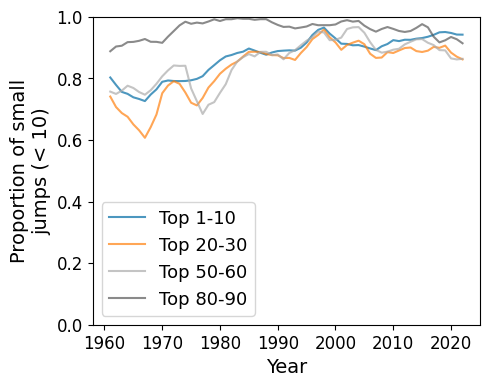

In [214]:
plt.figure(figsize=(5, 4))

diffusion_jumps_top_10 = []
diffusion_jumps_top_20_30 = []
diffusion_jumps_top_50_60 = []
diffusion_jumps_top_80_90 = []
for year in range(1959, 2023):
    songs_from_year = billboard_hot_100[billboard_hot_100["year"] == year].dropna()
    diffusion_jumps_top_10.append(songs_from_year[songs_from_year["top_position"] <= 10]["diffusion_jump"].mean())
    diffusion_jumps_top_20_30.append(songs_from_year[(songs_from_year["top_position"] > 20) & (songs_from_year["top_position"] <= 30)]["diffusion_jump"].mean())
    diffusion_jumps_top_50_60.append(songs_from_year[(songs_from_year["top_position"] > 50) & (songs_from_year["top_position"] <= 60)]["diffusion_jump"].mean())
    diffusion_jumps_top_80_90.append(songs_from_year[(songs_from_year["top_position"] > 80) & (songs_from_year["top_position"] <= 90)]["diffusion_jump"].mean())

plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_10, 3), label="Top 1-10", alpha=0.7)
plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_20_30, 3), label="Top 20-30", alpha=0.7)
plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_50_60, 3), label="Top 50-60", alpha=0.7)
plt.plot(range(1959, 2023)[2:], moving_average(diffusion_jumps_top_80_90, 3), label="Top 80-90", alpha=0.7)
plt.xlabel("Year")
plt.ylabel("Proportion of small\njumps (< 10)")
plt.ylim([0, 1])
plt.legend(fontsize=13, loc="lower left")
plt.savefig("appendix/Test1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### Histogram of position change

In [215]:
import matplotlib.patches as patches

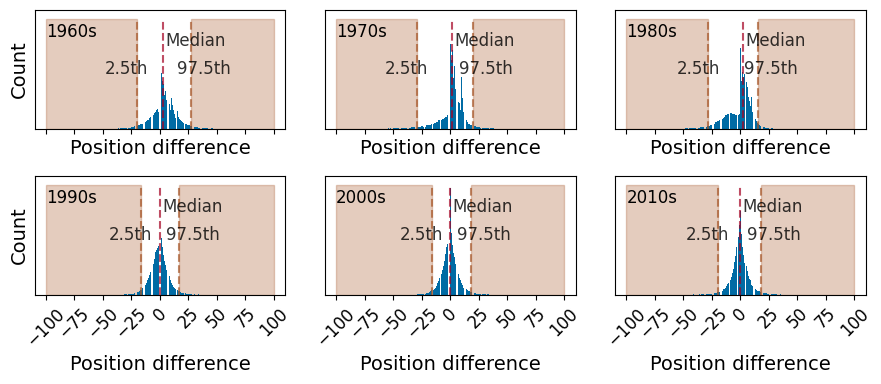

In [216]:
fig, axes = plt.subplots(2, 3, figsize=(9, 4), sharex=True, sharey=True)

row = 0
col = 0

billboard_subset = billboard_hot_100[["year", "first_day_of_the_week", "position_change"]]

for year in [1960, 1970, 1980, 1990, 2000, 2010]:
    decade_subset = billboard_subset[(billboard_subset["year"] >= year) &\
        (billboard_subset["year"] < year + 10)]["position_change"]
    count_changes = decade_subset.value_counts().sort_index()

    perecentile_25 = decade_subset.quantile(0.025)
    perecentile_975 = decade_subset.quantile(0.975)
    perecentile_50 = decade_subset.quantile(0.5)
    brown = "#a65628"
    red = "#a40122"

    axes[row, col].vlines(perecentile_25, ymin=0, ymax=6000, color=brown, linestyle='--', alpha=0.7)
    axes[row, col].vlines(perecentile_975, ymin=0, ymax=6000, color=brown, linestyle='--', alpha=0.7)
    axes[row, col].vlines(perecentile_50, ymin=0, ymax=6000, color=red, linestyle='--', alpha=0.7)
    
    # mark the percentiles 
    rect_left = patches.Rectangle((-100, 0), 100 + perecentile_25, 6000, linewidth=1, edgecolor=brown, facecolor=brown, alpha=0.3)
    axes[row, col].add_patch(rect_left)
    axes[row, col].text(perecentile_25 - 28, 3000, "2.5th", size=12, alpha = 0.8)
    rect_right = patches.Rectangle((perecentile_975, 0), 100 - perecentile_975, 6000, linewidth=1, edgecolor=brown, facecolor=brown, alpha=0.3)
    axes[row, col].add_patch(rect_right)
    axes[row, col].text(perecentile_975 - 12, 3000, "97.5th", size=12, alpha = 0.8)

    axes[row, col].text(perecentile_50 + 2, 4500, "Median", size=12, alpha = 0.8)
    axes[row, col].bar(count_changes.index, count_changes.values)

    axes[row, col].text(-100, 5000, f"{year}s")

    axes[row, col].set_xlabel("Position difference")
    if col == 0:
        axes[row, col].set_ylabel("Count")
    else:
        axes[row, col].set_ylabel(None)
    
    axes[row, col].xaxis.set_major_locator(plt.MaxNLocator(10))
    for tick in axes[row, col].get_xticklabels():
        tick.set_rotation(45)


    if col != 0 and col != 3:
        axes[row, col].set_yticks([])
        axes[row, col].set_yticks([], minor=True)
        axes[row, col].yaxis.set_tick_params(labelbottom=False)

    col += 1
    if col == 3:
        col = 0
        row += 1

plt.xticks(rotation=45)
plt.locator_params(axis='x', nbins=10)
fig.tight_layout()
plt.savefig("appendix/Test2.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### Features

In [217]:
years = range(1959, 2022)

100%|██████████| 63/63 [00:00<00:00, 226.32it/s]


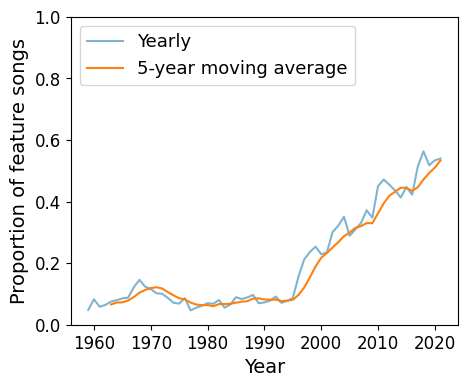

In [218]:
plt.figure(figsize=(5, 4))

percentages = []

for year in tqdm(years):
    artists_from_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist"]].drop_duplicates()
    artists_features = artists_from_year[(artists_from_year["artist"].str.lower().str.contains("featuring")) |\
        (artists_from_year["artist"].str.lower().str.contains("&"))]
    percentage_of_new_features = len(artists_features)/len(artists_from_year)
    percentages.append(percentage_of_new_features)

plt.plot(years, percentages, alpha=0.5)
plt.plot(years[4:], moving_average(percentages, 5))

plt.xlabel("Year")
plt.ylim([0, 1])
plt.ylabel("Proportion of feature songs")
plt.legend(["Yearly", "5-year moving average"], loc="upper left", fontsize=13)
plt.show()

P values for Billboard data: [3.38719577e-011 5.73473836e-001 3.42622561e-027 1.11681891e-145]
Break year: 1990


C:\Users\cutie\AppData\Local\Temp\ipykernel_7796\3145108395.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('year').apply(lambda x: len(x[x['artists'].str.contains(',')]) / len(x))


P values for Kaggle data: [6.36752133e-17 6.33961856e-05]


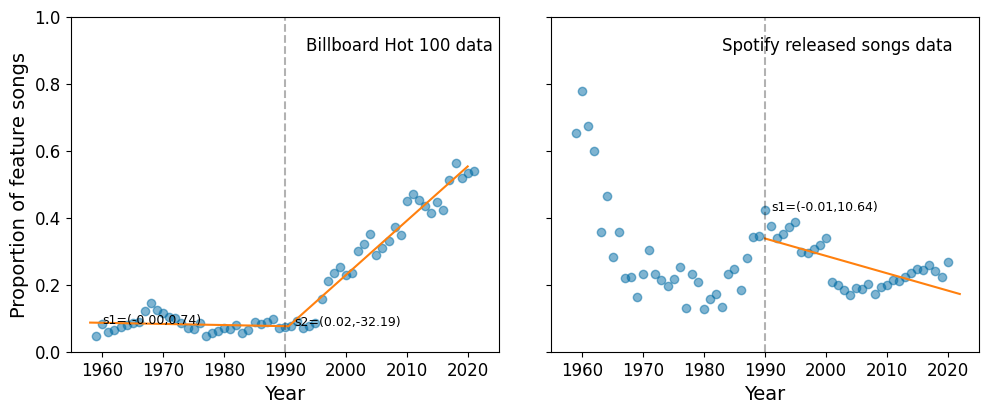

In [219]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
# billboard
ax = axes[0]
model = pwlf.PiecewiseLinFit(years, percentages)
values = model.fit(2)
x_hat = np.linspace(1958, 2020, 100)
y_hat = model.predict(x_hat)

print(f"P values for Billboard data: {model.p_values(method='non-linear')}")

ax.plot(years, percentages[0:len(years)], 'o', alpha=0.5)
ax.plot(x_hat, y_hat)

slopes = model.calc_slopes()
intercepts = model.intercepts

ax.text(0.55, 0.9, "Billboard Hot 100 data", transform=ax.transAxes)

for i, (slope, intercept) in enumerate(zip(slopes, intercepts)):
    ax.text(values[i] + 1, percentages[np.ceil(values[i].astype(int)) - 1958], f"s{i+1}=({slope:.2f},{intercept:.2f})", fontsize=9)

break_year = math.floor(values[1])
print(f"Break year: {break_year}")
# kaggle
data = data_kaggle[data_kaggle['year'] >= 1959]

ax = axes[1]
data = data.groupby('year').apply(lambda x: len(x[x['artists'].str.contains(',')]) / len(x))
model = pwlf.PiecewiseLinFit(data.index[31:], data.values[31:])
values = model.fit(1)
x_hat = np.linspace(1990, 2022, 100)
y_hat = model.predict(x_hat)

print(f"P values for Kaggle data: {model.p_values()}")

ax.plot(data.index, data.values, 'o', alpha=0.5)
ax.plot(x_hat, y_hat, '-')
slopes = model.calc_slopes()
intercepts = model.intercepts

ax.text(0.4, 0.9, "Spotify released songs data", transform=ax.transAxes)

for i, (slope, intercept) in enumerate(zip(slopes, intercepts)):
    ax.text(values[i] + 1, data[np.ceil(values[i].astype(int))], f"s{i+1}=({slope:.2f},{intercept:.2f})", fontsize=9)

fig.tight_layout()
axes[0].set_xlabel("Year")
axes[1].set_xlabel("Year")
axes[0].set_ylabel("Proportion of feature songs")
axes[0].axvline(x=break_year, color='black', ls="dashed", alpha=0.3)
axes[1].axvline(x=break_year, color='black', ls="dashed", alpha=0.3)
plt.ylim([0, 1])
plt.savefig("appendix/3.C.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### New artists

100%|██████████| 63/63 [00:21<00:00,  2.95it/s]


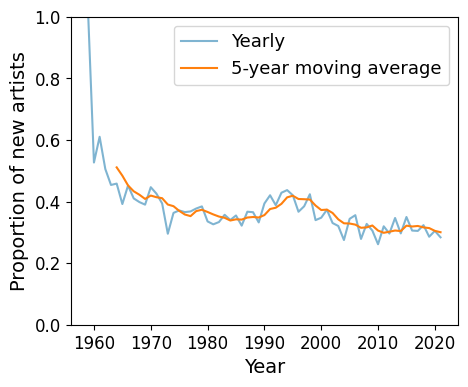

In [220]:
plt.figure(figsize=(5, 4))
years = range(1959, 2022)

percentages = []
first_week = billboard_hot_100["first_day_of_the_week"].min() + timedelta(weeks=1)
last_week = billboard_hot_100["first_day_of_the_week"].max()

for year in tqdm(years):
    artists_from_year = billboard_hot_100[(billboard_hot_100["year"] == year) &\
        ~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))][["artist"]].drop_duplicates()
    artists_from_previous_years = billboard_hot_100[billboard_hot_100["year"] < year]["artist"].drop_duplicates()
    new_artists = artists_from_year[~artists_from_year["artist"].isin(artists_from_previous_years)]
    percentage_of_new_artists = len(new_artists)/len(artists_from_year)
    percentages.append(percentage_of_new_artists)

plt.plot(years, percentages, alpha=0.5)
plt.plot(years[5:], moving_average(percentages[1:], 5))

plt.xlabel("Year")
plt.ylabel("Proportion of new artists")
plt.ylim([0, 1])
plt.legend(["Yearly", "5-year moving average"], loc="upper right", fontsize=13)
plt.show()

Observed stat: -0.003334943675848447
95% CI: (-0.001, 0.001)
Observed stat -0.003334943675848447 is outside the 95% CI (indicating significance).
Best r squared: 0.35841651415308695
P values: [3.63285715e-32 2.18742768e-07]


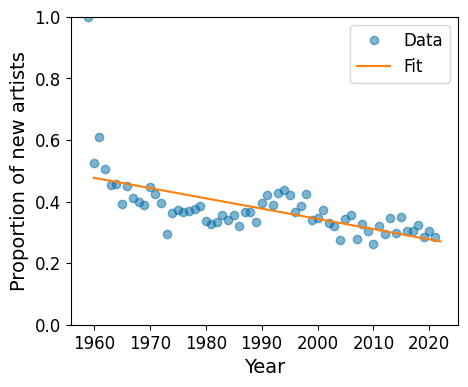

In [221]:
plt.figure(figsize=(5, 4))

model = pwlf.PiecewiseLinFit(range(1959, 2022), percentages)
breaks = model.fit(1)

x = range(1959, 2022)
y = percentages

r_squared_best = model.r_squared()
p_values_best = model.p_values(method="non-linear")
slope_best = model.slopes[0]

test_slopes = []

for i in range(1, 1001):
    # shuffle points and perform piecewise linear regression
    y_test = np.random.permutation(y) 
    model_test = pwlf.PiecewiseLinFit(x, y_test)
    model_test.fit(1)
    slopes = model_test.slopes
    test_slopes.append(slopes[0])

# Compute 95% confidence interval (CI) for the observed statistic
lower_percentile = 2.5
upper_percentile = 97.5

ci_lower = np.percentile(test_slopes, lower_percentile)
ci_upper = np.percentile(test_slopes, upper_percentile)

print(f"Observed stat: {slope_best}")
print(f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")

if slope_best < ci_lower or slope_best > ci_upper:
    print(f"Observed stat {slope_best} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed stat {slope_best} is inside the 95% CI.")

print(f"Best r squared: {r_squared_best}")
print(f"P values: {p_values_best}")

x_hat = np.linspace(1960, 2022, 100)
y_hat = model.predict(x_hat)

plt.plot(range(1959, 2022), percentages, 'o', alpha=0.5)
plt.plot(x_hat, y_hat)

plt.legend(["Data", "Fit"])
plt.xlabel("Year")
plt.ylabel("Proportion of new artists")
plt.ylim([0, 1])
plt.savefig("appendix/3.D.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

### Proportion of artists with X songs

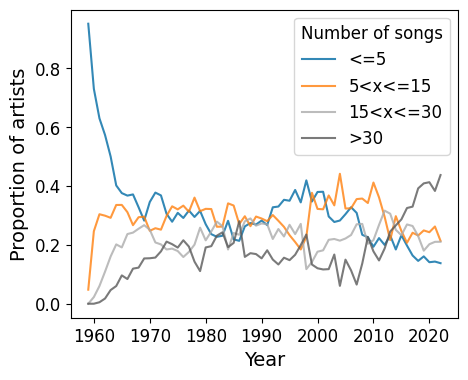

In [222]:
plt.figure(figsize=(5, 4))

df = billboard_hot_100[~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))]
songs_numbers_count = df[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages_5_less = []
averages_3 = []
averages_5 = []
averages_10 = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].copy()
    numbers_of_songs["less_than_5"] = (numbers_of_songs["total_number_of_songs"] <= 5)
    numbers_of_songs["more_than_3_songs"] = (numbers_of_songs["total_number_of_songs"] > 5) & (numbers_of_songs["total_number_of_songs"] <= 15)
    numbers_of_songs["more_than_5_songs"] = (numbers_of_songs["total_number_of_songs"] > 15) & (numbers_of_songs["total_number_of_songs"] <= 30)
    numbers_of_songs["more_than_10_songs"] = numbers_of_songs["total_number_of_songs"] > 30
    averages_3.append(numbers_of_songs["more_than_3_songs"].mean())
    averages_5.append(numbers_of_songs["more_than_5_songs"].mean())
    averages_10.append(numbers_of_songs["more_than_10_songs"].mean())
    averages_5_less.append(numbers_of_songs["less_than_5"].mean())
    
plt.plot(range(1959, 2023), averages_5_less, alpha=0.8)
plt.plot(range(1959, 2023), averages_3, alpha=0.8)
plt.plot(range(1959, 2023), averages_5, alpha=0.8)
plt.plot(range(1959, 2023), averages_10, alpha=0.8)
plt.xlabel("Year")
plt.ylabel("Proportion of artists")
legend = plt.legend(["<=5", "5<x<=15", "15<x<=30", ">30"], title="Number of songs", fontsize=12, bbox_to_anchor=(1, 1))
legend.get_title().set_fontsize('12')
plt.savefig("appendix/3.B.1.jpg", format="jpg", dpi=300, bbox_inches="tight")
plt.show()

## Hitmakers

### Distribution of number of songs

In [223]:
number_of_songs = billboard_hot_100[["artist", "song_name"]].drop_duplicates().groupby("artist")["song_name"].count().reset_index(name="song_count")
billboard_hot_100["number_of_songs"] = billboard_hot_100["artist"].map(lambda artist: number_of_songs[number_of_songs["artist"] == artist]["song_count"].iloc[0])

In [224]:
numbers_of_songs = billboard_hot_100[["artist", "number_of_songs"]].drop_duplicates()
count_numbers_of_songs = numbers_of_songs["number_of_songs"].value_counts().sort_index()

In [225]:
top_4_artists = numbers_of_songs[numbers_of_songs["number_of_songs"] > 30].sort_values("number_of_songs", ascending=False).head(4)

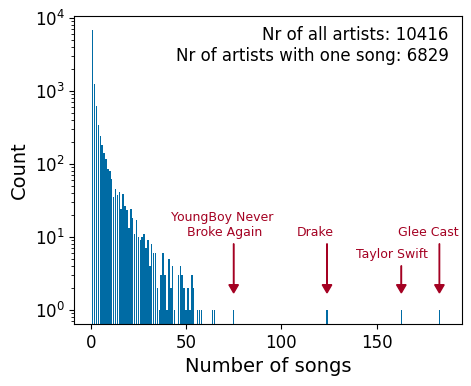

In [226]:
plt.figure(figsize=(5, 4))

plt.bar(count_numbers_of_songs.index, count_numbers_of_songs.values)
nartists = billboard_hot_100["artist"].nunique()
onesong = count_numbers_of_songs[1]
plt.text(90, 5000, f"Nr of all artists: {nartists}", fontsize=12)
plt.text(45, 2600, f"Nr of artists with one song: {onesong}", fontsize=12)

for i, (_, top_artist)in enumerate(top_4_artists.iterrows()):
    number_of_songs = top_artist["number_of_songs"]
    if i != 1:
        artist_text = top_artist["artist"]
        if len(top_artist["artist"]) > 15:
            artist_text = top_artist["artist"][:15] + "\n" + top_artist["artist"][15:]
            plt.text(number_of_songs - 5, 23, artist_text, fontsize=9, color=red, va="top", ha="center")
        else:
            plt.text(number_of_songs - 6, 14, artist_text, fontsize=9, color=red, va="top", ha="center")
        plt.arrow(number_of_songs, 8, 0, -5.8, width=0.2, head_width=5, head_length=0.5, color=red)
    else:
        plt.arrow(number_of_songs, 4, 0, -1.8, width=0.2, head_width=5, head_length=0.5, color=red)
        plt.text(number_of_songs - 5, 7, top_artist["artist"], fontsize=9, color=red, va="top", ha="center")

plt.xlabel("Number of songs")
plt.ylabel("Count")
plt.yscale("log")
plt.show()

### Proportion of songs by hitmakers

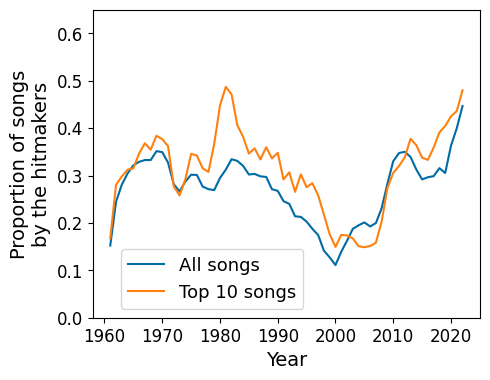

In [227]:
plt.figure(figsize=(5, 4))

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(
    ["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages = []
averages_10 = []
medians = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
    hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
    songs_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", 'song_name']].drop_duplicates()
    songs_from_this_year['hitmaker'] = songs_from_this_year["artist"].isin(hitmakers)
    averages.append(songs_from_this_year["hitmaker"].mean())

    songs_data_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", "song_name", "top_position"]].drop_duplicates().copy()
    songs_data_from_this_year = songs_data_from_this_year[songs_data_from_this_year["top_position"] <= 10]
    songs_data_from_this_year["hitmaker"] = songs_data_from_this_year["artist"].isin(hitmakers)
    averages_10.append(songs_data_from_this_year["hitmaker"].mean())
    
plt.plot(range(1959, 2023)[2:], moving_average(averages, 3))
plt.plot(range(1959, 2023)[2:], moving_average(averages_10, 3))
plt.xlabel("Year")
plt.ylabel("Proportion of songs\nby the hitmakers")
plt.legend(["All songs", "Top 10 songs"], loc="lower left", bbox_to_anchor=(0.05, 0), fontsize=13)
plt.ylim([0, 0.65])
plt.show()

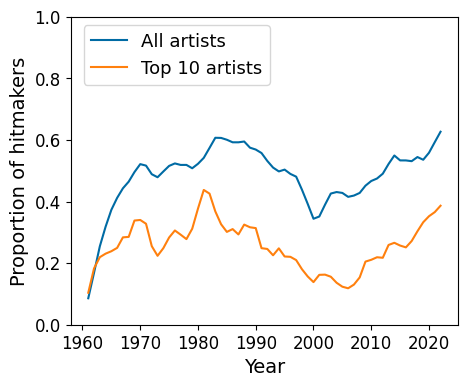

In [228]:
plt.figure(figsize=(5, 4))

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages = []
averages_10 = []
medians = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].drop_duplicates().copy()
    numbers_of_songs["hitmaker"] = numbers_of_songs["total_number_of_songs"] > 10
    averages.append(numbers_of_songs["hitmaker"].mean())

    hitmakers = numbers_of_songs[numbers_of_songs["hitmaker"] == True]["artist"]
    songs_data_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", "year", "top_position"]].drop_duplicates().copy()
    songs_data_from_this_year = songs_data_from_this_year[songs_data_from_this_year["top_position"] <= 10]
    songs_data_from_this_year["hitmaker"] = songs_data_from_this_year["artist"].isin(hitmakers)
    songs_data_from_this_year = songs_data_from_this_year[["hitmaker", "artist"]].drop_duplicates()
    averages_10.append(songs_data_from_this_year["hitmaker"].mean())
    
plt.plot(range(1959, 2023)[2:], moving_average(averages, 3))
plt.plot(range(1959, 2023)[2:], moving_average(averages_10, 3))
plt.xlabel("Year")
plt.ylabel("Proportion of hitmakers")
plt.legend(["All artists", "Top 10 artists"], loc="lower left", bbox_to_anchor=(0.01, 0.75), fontsize=13)
plt.ylim([0, 1])
plt.show()

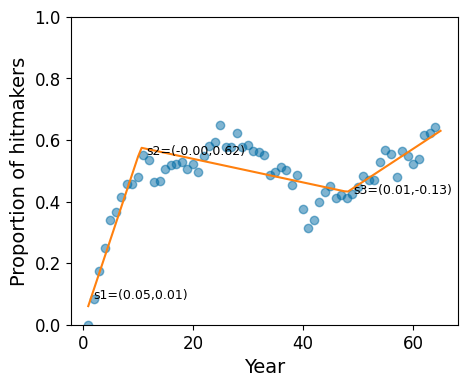

In [229]:
plt.figure(figsize=(5, 4))

x = range(1, len(averages) + 1)
y = averages

model = pwlf.PiecewiseLinFit(x, y)
x_hat = np.linspace(1, len(x) + 1, 100)
values = model.fit(3)
y_hat = model.predict(x_hat)
plt.plot(x, y, 'o', alpha=0.5)
plt.plot(x_hat, y_hat, '-')
slopes = model.calc_slopes()
intercepts = model.intercepts

for i, (slope, intercept) in enumerate(zip(slopes, intercepts)):
    plt.text(values[i] + 1, y[np.ceil(values[i].astype(int))], f"s{i+1}=({slope:.2f},{intercept:.2f})", fontsize=9)

plt.xlabel("Year")
plt.ylabel("Proportion of hitmakers")
plt.ylim([0, 1])
plt.show()

## Hitmakers top ranks

Text(0, 0.5, 'Top position')

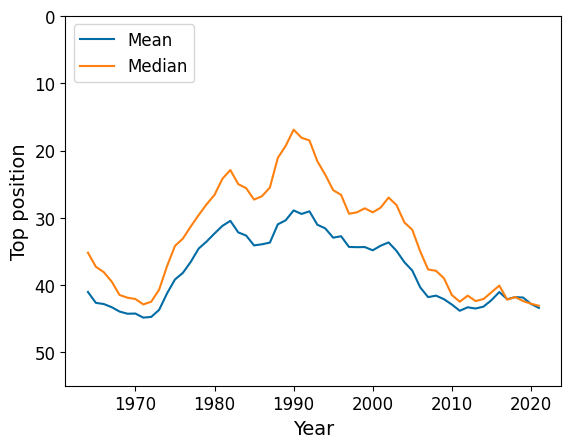

In [230]:
df = billboard_hot_100[~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))]
songs_numbers_count = df[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

averages = []
medians = []

for year in range(1959, 2022):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
    hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
    hitmakers_songs = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"] == year)].groupby(['artist', 'song_name', 'top_position']).first().reset_index()
    averages.append(hitmakers_songs["top_position"].mean())
    medians.append(hitmakers_songs["top_position"].median())

plt.plot(range(1959, 2022)[4:], moving_average(averages,5))
plt.plot(range(1959, 2022)[4:], moving_average(medians,5))

plt.gca().invert_yaxis()
plt.legend(["Mean", "Median"], loc="upper left")
plt.ylim([55, 0])
plt.xlabel("Year")
plt.ylabel("Top position")

Observed diff: 0.6126898989951368
95% CI: (0.017, 0.160)
Observed diff 0.6126898989951368 is outside the 95% CI (indicating significance).


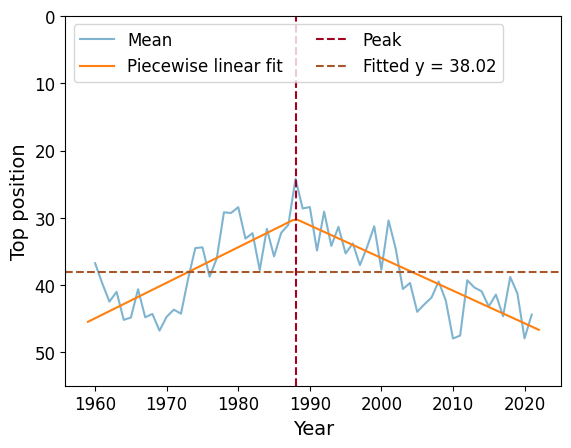

In [231]:
model = pwlf.PiecewiseLinFit(range(1960, 2022), averages[1:])
values = model.fit(2)
x_hat = np.linspace(1959, 2022, 100)
y_hat = model.predict(x_hat)

plt.plot(range(1959, 2022), averages, alpha=0.5)

plt.plot(x_hat, y_hat)

plt.axvline(x=values[1], color=red, linestyle='--')

from scipy.optimize import minimize
x = np.array(range(1960, 2022))
y = np.array(averages[1:])

def r_squared(b):
    y_pred = b  # Horizontal line
    ss_res = np.sum((y - y_pred)**2)  # Residual sum of squares
    ss_tot = np.sum((y - np.mean(y))**2)  # Total sum of squares
    return 1 - (ss_res / ss_tot)  # R^2 formula

def objective_function(b):
    ss_res = np.sum((y - b)**2)  # Residual sum of squares
    return ss_res

# Optimize to find b that minimizes R^2
result = minimize(objective_function, x0=[np.mean(averages[1:])])  # Initial guess for b
b_fit = result.x[0]

r_squared_diffs = []

for i in range(1, 1001):
    y_test = np.random.permutation(y)
    result1 = minimize(objective_function, x0=[np.mean(y_test)])
    r_squared_1 = r_squared(result1.x[0])
    pwlf_model = pwlf.PiecewiseLinFit(x, y_test)
    pwlf_model.fit(2)
    r_squared_diffs.append(pwlf_model.r_squared() - r_squared_1)

lower_percentile = 2.5
upper_percentile = 97.5

ci_lower = np.percentile(r_squared_diffs, lower_percentile)
ci_upper = np.percentile(r_squared_diffs, upper_percentile)

print(f"Observed diff: {model.r_squared() - r_squared(b_fit)}")
print(f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")

if model.r_squared() - r_squared(b_fit) < ci_lower or model.r_squared() - r_squared(b_fit) > ci_upper:
    print(f"Observed diff {model.r_squared() - r_squared(b_fit)} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed diff {model.r_squared() - r_squared(b_fit)} is inside the 95% CI.")

# Plotting
plt.axhline(b_fit, linestyle="--", color=brown)

plt.gca().invert_yaxis()
plt.legend(["Mean", "Piecewise linear fit", "Peak", f"Fitted y = {b_fit:.2f}"], ncol=2, loc="upper left")
plt.ylim([55, 0])
plt.xlabel("Year")
plt.ylabel("Top position")
plt.savefig("appendix/3.E.1.jpg", format="jpg", dpi=300)

plt.show()

In [232]:
import statistics
songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

averages = []
stds = []

songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= 1990].copy()
songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
hitmakers_songs = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(1980, 1991)))].groupby(['artist', 'song_name']).first().copy()
percentage = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(1980, 1991)))].groupby(['artist', 'song_name']).count().shape[0] / billboard_hot_100[billboard_hot_100["year"] <= 1990].groupby(['artist', 'song_name']).count().shape[0]
print(f'Percentage of songs by htimakers {percentage}')
data = hitmakers_songs["top_position"].value_counts().sort_index()
variance1 = np.var(hitmakers_songs["top_position"])
n1 = len(hitmakers_songs["top_position"])
data1 = hitmakers_songs["top_position"].values
data_1 = data
print(f'Variance {statistics.variance(hitmakers_songs["top_position"])}')

Percentage of songs by htimakers 0.11132293471981514
Variance 744.0113956935951


In [233]:
songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

averages = []
stds = []

songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= 2020].copy()
songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
hitmakers_songs = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(2010, 2021)))].groupby(['artist', 'song_name']).first().copy()
percentage = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"].isin(range(2010, 2021)))].groupby(['artist', 'song_name']).count().shape[0] / billboard_hot_100[billboard_hot_100["year"] >= 2000].groupby(['artist', 'song_name']).count().shape[0]
print(f'Percentage of songs by htimakers {percentage}')
data = hitmakers_songs["top_position"].value_counts().sort_index()
variance2 = np.var(hitmakers_songs["top_position"])
n2 = len(hitmakers_songs["top_position"])
data2 = hitmakers_songs["top_position"].values
print(f'Variance {statistics.variance(hitmakers_songs["top_position"])}')
data_2 = data


Percentage of songs by htimakers 0.22644361584198328
Variance 825.4651001969183


In [234]:
import numpy as np

# Example: before and after datasets
before = data1
after = data2

# Bootstrap resampling for variance comparison
n_bootstrap = 100
var_diff_boot = []

for _ in range(n_bootstrap):
    # Resample with replacement
    resampled_before = np.random.choice(before, size=len(before), replace=True)
    resampled_after = np.random.choice(after, size=len(after), replace=True)

    # Calculate variances
    var_before = np.var(resampled_before, ddof=1)
    var_after = np.var(resampled_after, ddof=1)

    # Store the difference in variances
    var_diff_boot.append(var_before - var_after)

# Calculate the observed difference in variances
observed_var_diff = np.var(before, ddof=1) - np.var(after, ddof=1)

# Calculate p-value (proportion of bootstrap samples where the difference is greater than or equal to observed)
p_value = np.mean(np.abs(var_diff_boot) >= np.abs(observed_var_diff))

print(f"Observed variance difference: {observed_var_diff}")
print(f"P-value from bootstrap test: {p_value}")

if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")

Observed variance difference: -81.45370450332337
P-value from bootstrap test: 0.49
The variances are not significantly different.


C:\Users\cutie\AppData\Local\Temp\ipykernel_7796\3879210714.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[0].set_ylim([0, 500])
C:\Users\cutie\AppData\Local\Temp\ipykernel_7796\3879210714.py:13: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axes[1].set_ylim([0, 500])


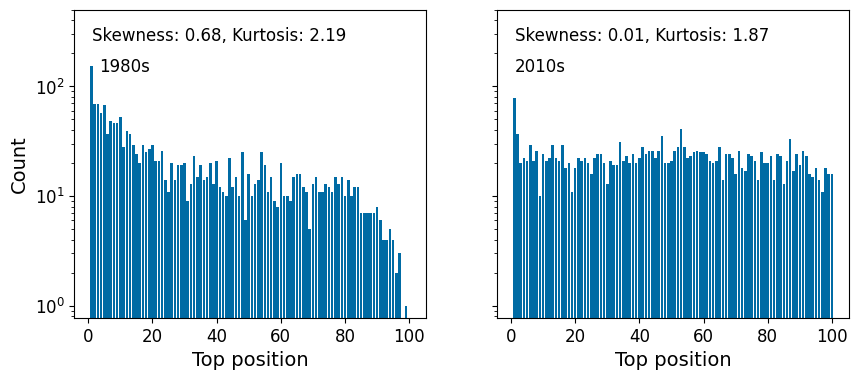

In [235]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)

axes[0].bar(data_1.index, data_1.values)
axes[0].set_yscale("log")
axes[0].set_ylim([0, 500])
skewness1 = np.mean((data1 - np.mean(data1))**3) / np.std(data1)**3
kurtosis1 = np.mean((data1 - np.mean(data1))**4) / np.std(data1)**4
axes[0].text(0.05, 0.9, f"Skewness: {skewness1:.2f}, Kurtosis: {kurtosis1:.2f}", transform=axes[0].transAxes)
axes[0].text(0.07, 0.8, f"1980s", transform=axes[0].transAxes)

axes[1].bar(data_2.index, data_2.values)
axes[1].set_yscale("log")
axes[1].set_ylim([0, 500])
skewness2 = np.mean((data2 - np.mean(data2))**3) / np.std(data2)**3
kurtosis2 = np.mean((data2 - np.mean(data2))**4) / np.std(data2)**4
axes[1].text(0.05, 0.9, f"Skewness: {skewness2:.2f}, Kurtosis: {kurtosis2:.2f}", transform=axes[1].transAxes)
axes[1].text(0.05, 0.8, f"2010s", transform=axes[1].transAxes)
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Top position")
axes[1].set_xlabel("Top position")
plt.savefig("appendix/3.E.2.jpg", format="jpg", dpi=300, bbox_inches="tight")

plt.show()

In [236]:
df = pd.DataFrame(columns=['top_position', 'count', 'decade'])
for i in range(1, 101):
    if (data_1.get(i) != None):
        df = pd.concat([df, pd.DataFrame({'top_position': [i], 'count': [data_1[i]], 'decade': ['1980']})], ignore_index=True)
    if (data_2.get(i) != None):
        df = pd.concat([df, pd.DataFrame({'top_position': [i], 'count': [data_2[i]], 'decade': ['2010']})], ignore_index=True)

skewness1_shuffle = []
skewness2_shuffle = []
df_copy = df.copy() 
for i in range(1, 1001):
    # shuffle decade column
    df_copy["decade"] = np.random.permutation(df_copy["decade"])
    data_1 = df_copy[df_copy["decade"] == "1980"]["count"].values
    data_2 = df_copy[df_copy["decade"] == "2010"]["count"].values
    skewness1_shuffle.append(np.mean((data_1 - np.mean(data_1))**3) / np.std(data_1)**3)
    skewness2_shuffle.append(np.mean((data_2 - np.mean(data_2))**3) / np.std(data_2)**3)

lower_percentile = 2.5
upper_percentile = 97.5

ci_lower = np.percentile(skewness1_shuffle, lower_percentile)
ci_upper = np.percentile(skewness1_shuffle, upper_percentile)

print(f"Observed skewness: {skewness1}")
print(f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")

if skewness1 < ci_lower or skewness1 > ci_upper:
    print(f"Observed skewness {skewness1} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed skewness {skewness1} is inside the 95% CI.")

lower_percentile = 2.5
upper_percentile = 97.5

ci_lower = np.percentile(skewness2_shuffle, lower_percentile)
ci_upper = np.percentile(skewness2_shuffle, upper_percentile)

print(f"Observed skewness: {skewness2}")
print(f"95% CI: ({ci_lower:.3f}, {ci_upper:.3f})")

if skewness2 < ci_lower or skewness2 > ci_upper:
    print(f"Observed skewness {skewness2} is outside the 95% CI (indicating significance).")
else:
    print(f"Observed skewness {skewness2} is inside the 95% CI.")
    

Observed skewness: 0.6801914984022953
95% CI: (1.096, 5.799)
Observed skewness 0.6801914984022953 is outside the 95% CI (indicating significance).
Observed skewness: 0.014546561453356593
95% CI: (1.185, 5.782)
Observed skewness 0.014546561453356593 is outside the 95% CI (indicating significance).


In [237]:
import numpy as np
from scipy.stats import fligner

stat, p_value = fligner(data1, data2)

print(f"Fligner-Killeen Test Statistic: {stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The variances are significantly different.")
else:
    print("The variances are not significantly different.")

Fligner-Killeen Test Statistic: 2.9926427045840938
P-value: 0.08364356242205209
The variances are not significantly different.


In [238]:
from scipy.stats import levene

stat, p_value = levene(data1, data2, center='mean') 

if p_value < 0.05:
    print(f"Variances are significantly different (p = {p_value:.3f})")
else:
    print(f"Variances are not significantly different (p = {p_value:.3f})")

Variances are significantly different (p = 0.026)


In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

def get_avg_top_position(year):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
    hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
    data = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"] == year)].groupby(['artist', 'song_name', 'top_position']).first().copy().reset_index()
    return data["top_position"].mean()

important_years = [1987, 1988, 1989]

# Interpret
for year in important_years:
    random_years = np.random.choice(range(1959, 2022), size=30, replace=False)
    avg_top_position = get_avg_top_position(year)
    avg_random = [get_avg_top_position(x) for x in random_years]
    print(f"Avg top position in {year}: {avg_top_position:.2f}")
    print(f"Avg top position in random years: {avg_random}")

    # Mann-Whitney U Test
    stat, p_value = mannwhitneyu([avg_top_position], avg_random, alternative='greater')

    if p_value <= 0.05:
        print(f"Significant difference in top position in {year}")

Avg top position in 1987: 30.75
Avg top position in random years: [np.float64(33.828125), np.float64(36.0709219858156), np.float64(42.33888888888889), np.float64(31.64375), np.float64(31.27659574468085), np.float64(38.44970414201183), np.float64(37.054794520547944), np.float64(47.97235023041475), np.float64(43.09756097560975), np.float64(40.903361344537814), np.float64(44.283236994219656), np.float64(28.41044776119403), np.float64(32.91860465116279), np.float64(44.49049429657795), np.float64(42.483870967741936), np.float64(38.81974248927039), np.float64(31.747252747252748), np.float64(29.282894736842106), np.float64(28.508474576271187), np.float64(35.03125), np.float64(41.25757575757576), np.float64(44.66025641025641), np.float64(40.39506172839506), np.float64(40.94488188976378), np.float64(44.17045454545455), np.float64(34.42307692307692), np.float64(30.492957746478872), np.float64(37.26900584795322), np.float64(44.75769230769231), np.float64(43.57065217391305)]
Avg top position in 19

### Together

100%|██████████| 63/63 [00:18<00:00,  3.43it/s]
C:\Users\cutie\AppData\Local\Temp\ipykernel_7796\2893394112.py:157: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig3.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Local\Temp\ipykernel_7796\2893394112.py:157: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  plt.savefig("fig3.jpg", format="jpg", bbox_inches='tight', dpi=300)
C:\Users\cutie\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or Axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


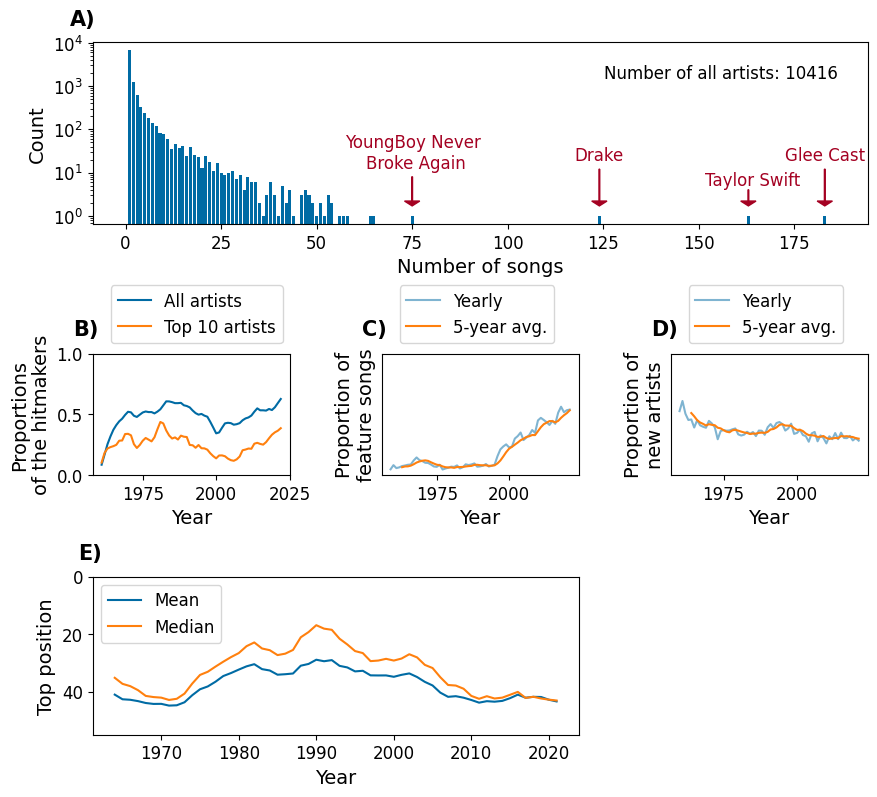

In [240]:
fig, axes = plt.subplot_mosaic([["A", "A", "A", "A", "A", "A", "A", "A"],
                                [".", ".", ".", ".", ".", ".", ".", "."],
                                ["B", "B", ".", "C", "C", ".", "D", "D"],
                                [".", ".", ".", ".", ".", ".", ".", "."],
                                ["E", "E", "E", "E", "E", ".", ".", "."]], figsize=(10, 9),
    gridspec_kw={'height_ratios': [1.5, 0.25, 1, 0.02, 1.3], 'width_ratios': [1, 1, 0.3, 1, 1, 0.3, 1, 1],
                'wspace': 0.5, 'hspace': 0.5}, constrained_layout=True)

# Plot A

ax = axes["A"]

ax.bar(count_numbers_of_songs.index, count_numbers_of_songs.values)
nartists = billboard_hot_100["artist"].nunique()
ax.text(0.66, 0.8, f"Number of all artists: {nartists}", transform=ax.transAxes)

for i, (_, top_artist) in enumerate(top_4_artists.iterrows()):
    number_of_songs = top_artist["number_of_songs"]
    if i != 1:
        artist_text = top_artist["artist"]
        if len(top_artist["artist"]) > 15:
            artist_text = top_artist["artist"][:15] + "\n" + top_artist["artist"][15:]
            ax.text(number_of_songs + 1, 80, artist_text, color=red, va="top", ha="center")
            ax.arrow(number_of_songs, 8, 0, -5.8, width=0.2, head_width=4, head_length=0.5, color=red)
        else:
            ax.text(number_of_songs, 40, artist_text, color=red, va="top", ha="center")
            ax.arrow(number_of_songs, 12, 0, -9.8, width=0.2, head_width=4, head_length=0.5, color=red)
    else:
        ax.arrow(number_of_songs, 4, 0, -1.8, width=0.2, head_width=4, head_length=0.5, color=red)
        ax.text(number_of_songs + 1, 11, top_artist["artist"], color=red, va="top", ha="center")

ax.set_xlabel("Number of songs")
ax.set_ylabel("Count")
ax.set_yscale("log")

axes['A'].text(-0.03, 1.09, 'A)', transform=axes['A'].transAxes, weight='bold', fontsize=15)

# Plot B

ax = axes["B"]

songs_numbers_count = billboard_hot_100[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")
averages = []
averages_10 = []
medians = []

for year in range(1959, 2023):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_from_this_year = songs_until_year[songs_until_year["year"] == year]["artist"]
    numbers_of_songs = songs_until_year[songs_until_year["artist"].isin(songs_from_this_year)].drop_duplicates().copy()
    numbers_of_songs["hitmaker"] = numbers_of_songs["total_number_of_songs"] > 10
    averages.append(numbers_of_songs["hitmaker"].mean())

    hitmakers = numbers_of_songs[numbers_of_songs["hitmaker"] == True]["artist"]
    songs_data_from_this_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist", "year", "top_position"]].drop_duplicates().copy()
    songs_data_from_this_year = songs_data_from_this_year[songs_data_from_this_year["top_position"] <= 10]
    songs_data_from_this_year["hitmaker"] = songs_data_from_this_year["artist"].isin(hitmakers)
    songs_data_from_this_year = songs_data_from_this_year[["hitmaker", "artist"]].drop_duplicates()
    averages_10.append(songs_data_from_this_year["hitmaker"].mean())
    
ax.plot(range(1959, 2023)[2:], moving_average(averages, 3))
ax.plot(range(1959, 2023)[2:], moving_average(averages_10, 3))
ax.set_xlabel("Year")
ax.set_ylabel("Proportions\nof the hitmakers")
ax.legend(["All artists", "Top 10 artists"], loc="upper left", bbox_to_anchor=(0.05, 1.63))
ax.set_ylim([0, 1])

axes['B'].text(-0.1, 1.15, 'B)', transform=axes['B'].transAxes, weight='bold', fontsize=15)

# Plot C

ax = axes["C"]

percentages = []

for year in tqdm(years):
    artists_from_year = billboard_hot_100[billboard_hot_100["year"] == year][["artist"]].drop_duplicates()
    artists_features = artists_from_year[(artists_from_year["artist"].str.lower().str.contains("featuring")) |\
        (artists_from_year["artist"].str.lower().str.contains("&"))]
    percentage_of_new_features = len(artists_features)/len(artists_from_year)
    percentages.append(percentage_of_new_features)

ax.plot(years, percentages, alpha=0.5)
ax.plot(years[4:], moving_average(percentages, 5))
ax.set_yticks([])
ax.set_yticks([], minor=True)
ax.yaxis.set_tick_params(labelbottom=False)

ax.set_xlabel("Year")
ax.set_ylim([0, 1])
ax.set_ylabel("Proportion of\nfeature songs")
ax.legend(["Yearly", "5-year avg."], loc="upper left", bbox_to_anchor=(0.05, 1.63))

axes['C'].text(-0.1, 1.15, 'C)', transform=axes['C'].transAxes, weight='bold', fontsize=15)

# Plot D

ax = axes["D"]

percentages = []
first_week = billboard_hot_100["first_day_of_the_week"].min() + timedelta(weeks=1)
last_week = billboard_hot_100["first_day_of_the_week"].max()

for year in tqdm(years):
    artists_from_year = billboard_hot_100[(billboard_hot_100["year"] == year) &\
        ~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))][["artist"]].drop_duplicates()
    artists_from_previous_years = billboard_hot_100[billboard_hot_100["year"] < year]["artist"].drop_duplicates()
    new_artists = artists_from_year[~artists_from_year["artist"].isin(artists_from_previous_years)]
    percentage_of_new_artists = len(new_artists)/len(artists_from_year)
    percentages.append(percentage_of_new_artists)

ax.plot(years[1:], percentages[1:], alpha=0.5)
ax.plot(years[5:], moving_average(percentages[1:], 5))
ax.set_yticks([])
ax.set_yticks([], minor=True)
ax.yaxis.set_tick_params(labelbottom=False)

ax.set_xlabel("Year")
ax.set_ylabel("Proportion of\nnew artists")
ax.set_ylim([0, 1])
ax.legend(["Yearly", "5-year avg."], loc="upper left", bbox_to_anchor=(0.05, 1.63))

axes['D'].text(-0.1, 1.15, 'D)', transform=axes['D'].transAxes, weight='bold', fontsize=15)

# Plot E

ax = axes["E"]
df = billboard_hot_100[~((billboard_hot_100["artist"].str.lower().str.contains("featuring")) |\
        (billboard_hot_100["artist"].str.lower().str.contains("&")))]
songs_numbers_count = df[["year", "artist", "song_name"]].groupby(["year", "artist"])["song_name"].nunique().reset_index(name="number_of_songs")

averages = []
medians = []

for year in range(1959, 2022):
    songs_until_year = songs_numbers_count[songs_numbers_count["year"] <= year].copy()
    songs_until_year["total_number_of_songs"] = songs_until_year.groupby(["artist"])["number_of_songs"].transform("sum")
    songs_until_year["hitmaker"] = songs_until_year["total_number_of_songs"] > 10
    hitmakers = songs_until_year[songs_until_year["hitmaker"] == True]['artist']
    hitmakers_songs = billboard_hot_100[billboard_hot_100["artist"].isin(hitmakers) & (billboard_hot_100["year"] == year)].groupby(['artist', 'song_name', 'top_position']).first().reset_index()
    averages.append(hitmakers_songs["top_position"].mean())
    medians.append(hitmakers_songs["top_position"].median())

ax.plot(range(1959, 2022)[4:], moving_average(averages,5))
ax.plot(range(1959, 2022)[4:], moving_average(medians,5))

ax.invert_yaxis()
ax.legend(["Mean", "Median"], loc="upper left")
ax.set_ylim([55, 0])
ax.set_xlabel("Year")
ax.set_ylabel("Top position")

axes['E'].text(-0.03, 1.11, 'E)', transform=axes['E'].transAxes, weight='bold', fontsize=15)

plt.savefig("fig3.jpg", format="jpg", bbox_inches='tight', dpi=300)
plt.show()